### Dataset Description:
- employee_id : Unique ID for employee
- department : Department of employee
- region : Region of employment (unordered)
- education : Education Level
- gender : Gender of Employee
- recruitment_channel : Channel of recruitment for employee
- no_of_trainings : no of other trainings completed in previous year on soft skills, technical skills etc.
- age : Age of Employee
- previous_year_rating : Employee Rating for the previous year
- length_of_service : Length of service in years
- KPIs_met >80% : if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
- awards_won? : if awards won during previous year then 1 else 0
- avg_training_score : Average score in current training evaluations
- is_promoted : (Target) Recommended for promotion

In [112]:
# import the necessary packages
import numpy as np
import pandas as pd

from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

from collections import Counter

%matplotlib inline

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn import metrics 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [114]:
# loading training data and reading top 5 records
df = pd.read_csv('data_hr.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [115]:
# Reading bottom 5 records
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [116]:
print("There are {} rows and {} columns in the training dataset.".format(df.shape[0],df.shape[1]))

There are 54808 rows and 14 columns in the training dataset.


### Exploratory Data Analysis

In [117]:
# To know the datatypes of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [118]:
print("There are {} duplicate records.".format(df.shape[0] - len(df['employee_id'].unique())))

There are 0 duplicate records.


In [119]:
# Droping employee_id column as it doesnot provide any information
df.drop('employee_id',axis=1,inplace=True)

In [120]:
print("Train data set dtypes: \n")
print(f"Total Cols: {len(df.columns)}")
print(f"{df.dtypes.value_counts()}")
print('-'*30)

Train data set dtypes: 

Total Cols: 13
int64      7
object     5
float64    1
dtype: int64
------------------------------


In [121]:
# Name of the columns
print("Column Names: {}".format(list(df.columns)))

Column Names: ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [122]:
# Column names into list
col_name = df.columns.to_list()

# To find out number of unique values and unique vales of a perticular column
for i in col_name:
    print("In the column - {}:".format(i))
    print("There are {0} Unique values".format(len(df[i].unique())))
    print("Unique vales in the column are - \n{}".format(list(df[i].unique())))
    print("")

In the column - department:
There are 9 Unique values
Unique vales in the column are - 
['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']

In the column - region:
There are 34 Unique values
Unique vales in the column are - 
['region_7', 'region_22', 'region_19', 'region_23', 'region_26', 'region_2', 'region_20', 'region_34', 'region_1', 'region_4', 'region_29', 'region_31', 'region_15', 'region_14', 'region_11', 'region_5', 'region_28', 'region_17', 'region_13', 'region_16', 'region_25', 'region_10', 'region_27', 'region_30', 'region_12', 'region_21', 'region_8', 'region_32', 'region_6', 'region_33', 'region_24', 'region_3', 'region_9', 'region_18']

In the column - education:
There are 4 Unique values
Unique vales in the column are - 
["Master's & above", "Bachelor's", nan, 'Below Secondary']

In the column - gender:
There are 2 Unique values
Unique vales in the column are - 
['f', 'm']

In the column - recruitment_channel:


#### Check Missing Values

In [123]:
print("There are totally {} missing values in the dataset.".format(df.isna().sum().sum()))

There are totally 6533 missing values in the dataset.


In [124]:
data = go.Bar(
            x=df.isnull().sum().index,
            y=df.isnull().sum(),
            name = "Missing Values"
)

layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, 
                layout = layout)

fig.update_layout(title_text='Total missing values in each columns',
                  xaxis_title="Column Name",
                  yaxis=dict(
                     title='Total Missing Value',
                     titlefont_size=16,
                     tickfont_size=14)
                 )

iplot(fig)

### Check Correlation Estimate 

In [14]:
# Compute Pearson correlation coefficient for the features in our data set.
df.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


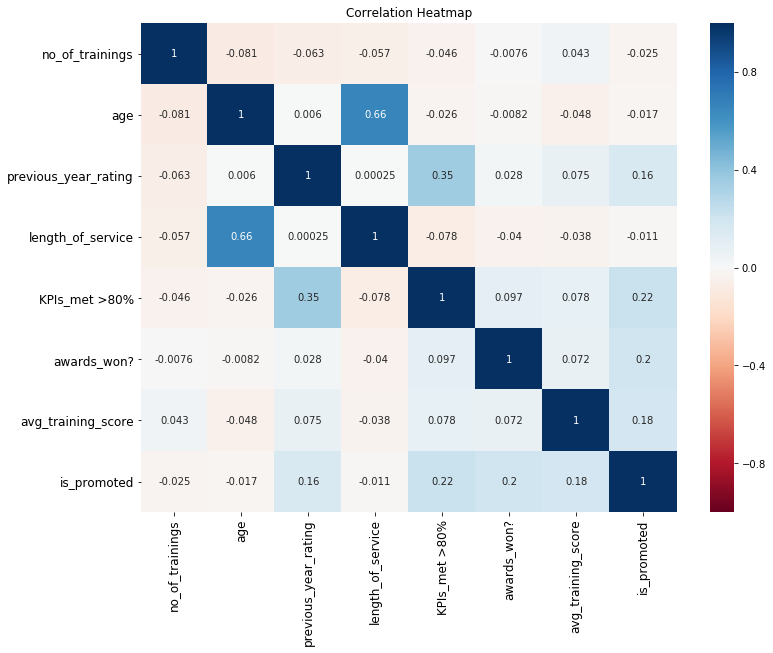

In [15]:
# We'll plot the correlations using a Heat Map.
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

#### Impute Missing Values

In [16]:
# Check description of data numeric
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [17]:
# Check description of data object
df.describe(include="object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [18]:
# Fill in missing values at education column with mode technique
df.loc[df['education'].isna(), 'education'] = "Bachelor's"

# Fill in missing values at previous_year_rating column with median technique
df.loc[df['previous_year_rating'].isna(), 'previous_year_rating'] = 3.0

In [19]:
df.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [20]:
df.loc[df['age'] == 20].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
50,Finance,region_2,Bachelor's,m,sourcing,1,20,4.0,2,1,0,60,0
90,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,20,3.0,1,0,0,55,0
950,HR,region_2,Below Secondary,f,sourcing,1,20,3.0,1,0,0,47,0
1045,Procurement,region_2,Below Secondary,m,sourcing,2,20,3.0,2,0,0,74,0
1202,Analytics,region_22,Bachelor's,m,other,1,20,3.0,1,1,0,84,0


In [21]:
df.loc[df['age'] == 21].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
2122,Finance,region_2,Below Secondary,m,other,2,21,3.0,1,0,0,60,0
2976,Finance,region_2,Below Secondary,m,sourcing,3,21,3.0,2,0,0,60,0
4207,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,21,3.0,1,1,0,52,1
4789,Sales & Marketing,region_2,Bachelor's,m,other,1,21,3.0,2,0,1,64,1
5180,Technology,region_2,Below Secondary,m,sourcing,1,21,3.0,1,0,0,81,0


### Feature Engineering

In [22]:
# df = df.drop(['region'],axis=1)

In [23]:
# Binning the age column
df['age'] = pd.cut(x=df['age'], bins=[19,30,40,80],
                    labels=['20 to 30', '31 to 40', '41+'])

# Changing datatype 'category' to 'object'
df['age'] = df['age'].astype('object')

In [24]:
df.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [25]:
df.loc[df['age'] == '20 to 30'].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1,Operations,region_22,Bachelor's,m,other,1,20 to 30,5.0,4,0,0,60,0
8,Analytics,region_20,Bachelor's,m,other,1,20 to 30,4.0,5,0,0,83,0
10,Technology,region_23,Bachelor's,m,sourcing,1,20 to 30,3.0,1,0,0,77,0
22,Finance,region_11,Bachelor's,f,other,1,20 to 30,3.0,4,0,0,63,0
23,Procurement,region_5,Bachelor's,m,other,1,20 to 30,3.0,1,0,0,70,0


In [26]:
df.loc[df['age'] == '31 to 40'].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,31 to 40,5.0,8,1,0,49,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,31 to 40,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,31 to 40,1.0,10,0,0,50,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31 to 40,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31 to 40,3.0,5,0,0,59,0


In [27]:
df_fe=df.copy()

In [28]:
df_fe.tail()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,Technology,region_14,Bachelor's,m,sourcing,1,41+,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,31 to 40,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,20 to 30,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,20 to 30,1.0,2,0,0,45,0
54807,HR,region_22,Bachelor's,m,other,1,20 to 30,1.0,5,0,0,49,0


##### fe-transform data

In [29]:
from sklearn.preprocessing import OrdinalEncoder

def ordinalencode(df_fe, col, order):
    encoder = OrdinalEncoder(categories=order)
    df_fe[col] = encoder.fit_transform(df_fe[[col]])

In [30]:
educationorder = [["Below Secondary","Bachelor's","Master's & above"]]
# notrainingsorder = [['=<5','5+']]
ageorder = [['20 to 30', '31 to 40', '41+']]
# lengthserviceorder = [['=<20','20+']]
# avg_training_score = [['5','6','7','8','9+']]

In [31]:
ordinalencode(df_fe, 'education', educationorder)
# ordinalencode(df_fe, 'no_of_trainings', notrainingsorder)
ordinalencode(df_fe, 'age', ageorder)
# ordinalencode(df_fe, 'length_of_service', lengthserviceorder)
# ordinalencode(df_fe, 'avg_training_score', avg_training_score)
df_fe.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,2.0,f,sourcing,1,1.0,5.0,8,1,0,49,0
1,Operations,region_22,1.0,m,other,1,0.0,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,1.0,m,sourcing,1,1.0,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,1.0,m,other,2,1.0,1.0,10,0,0,50,0
4,Technology,region_26,1.0,m,other,1,2.0,3.0,2,0,0,73,0


In [32]:
# col=['department','gender','recruitment_channel']
col=['region','department','gender','recruitment_channel']

for c in col:
    df_fe=pd.get_dummies(df_fe,columns=[c],prefix=c)

df_fe.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,region_region_1,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,2.0,1,1.0,5.0,8,1,0,49,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1.0,1,0.0,5.0,4,0,0,60,0,0,...,1,0,0,0,0,0,1,1,0,0
2,1.0,1,1.0,3.0,7,0,0,50,0,0,...,0,0,0,1,0,0,1,0,0,1
3,1.0,2,1.0,1.0,10,0,0,50,0,0,...,0,0,0,1,0,0,1,1,0,0
4,1.0,1,2.0,3.0,2,0,0,73,0,0,...,0,0,0,0,1,0,1,1,0,0


In [33]:
df_fe[df_fe.select_dtypes(['float64']).columns] = df_fe.select_dtypes(['float64']).apply(lambda x: x.astype('int64'))

In [34]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 57 columns):
education                       54808 non-null int64
no_of_trainings                 54808 non-null int64
age                             54808 non-null int64
previous_year_rating            54808 non-null int64
length_of_service               54808 non-null int64
KPIs_met >80%                   54808 non-null int64
awards_won?                     54808 non-null int64
avg_training_score              54808 non-null int64
is_promoted                     54808 non-null int64
region_region_1                 54808 non-null uint8
region_region_10                54808 non-null uint8
region_region_11                54808 non-null uint8
region_region_12                54808 non-null uint8
region_region_13                54808 non-null uint8
region_region_14                54808 non-null uint8
region_region_15                54808 non-null uint8
region_region_16                54808 non-n

#### Feature Selection

In [35]:
X = df_fe.copy()

y = X.pop("is_promoted") # hapus kolom is_fraud; namun kolom is_fraud yang terhapus disimpan di y

# cara menghitung MI-nya
mi_scores = mutual_info_classif(X, y, discrete_features = False)

# print(mi_scores)

mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
mi_scores = mi_scores.sort_values(ascending = False)
print(mi_scores)

avg_training_score              0.029568
KPIs_met >80%                   0.025552
previous_year_rating            0.017972
awards_won?                     0.009958
education                       0.007687
no_of_trainings                 0.006102
recruitment_channel_other       0.005113
gender_m                        0.004744
department_Sales & Marketing    0.003235
recruitment_channel_sourcing    0.003016
age                             0.002811
department_Technology           0.002127
region_region_32                0.001946
region_region_7                 0.001854
region_region_17                0.001658
region_region_31                0.001588
region_region_22                0.001462
department_R&D                  0.001300
department_Operations           0.001257
region_region_10                0.001118
region_region_16                0.001089
region_region_25                0.001041
region_region_9                 0.001022
region_region_15                0.000904
region_region_27

In [98]:
df_fs5 = df_fe[['avg_training_score','KPIs_met >80%','previous_year_rating','awards_won?','education','no_of_trainings',
                'length_of_service','age',
#                 'gender_m','gender_f',
                'recruitment_channel_sourcing',
                'recruitment_channel_referred',
                'recruitment_channel_other',
                'department_Technology','department_Analytics','department_Sales & Marketing','department_R&D',
                'department_Procurement','department_Operations','department_Finance','department_Legal','department_HR',
                'is_promoted']]

In [37]:
df_fs5.head()

,avg_training_score,KPIs_met >80%,previous_year_rating,awards_won?,education,no_of_trainings,length_of_service,age,recruitment_channel_sourcing,recruitment_channel_other,...,department_Technology,department_Analytics,department_Sales & Marketing,department_R&D,department_Procurement,department_Operations,department_Finance,department_Legal,department_HR,is_promoted
0,49,1,5,0,2,1,8,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,60,0,5,0,1,1,4,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,50,0,3,0,1,1,7,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,50,0,1,0,1,2,10,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,73,0,3,0,1,1,2,2,0,1,...,1,0,0,0,0,0,0,0,0,0


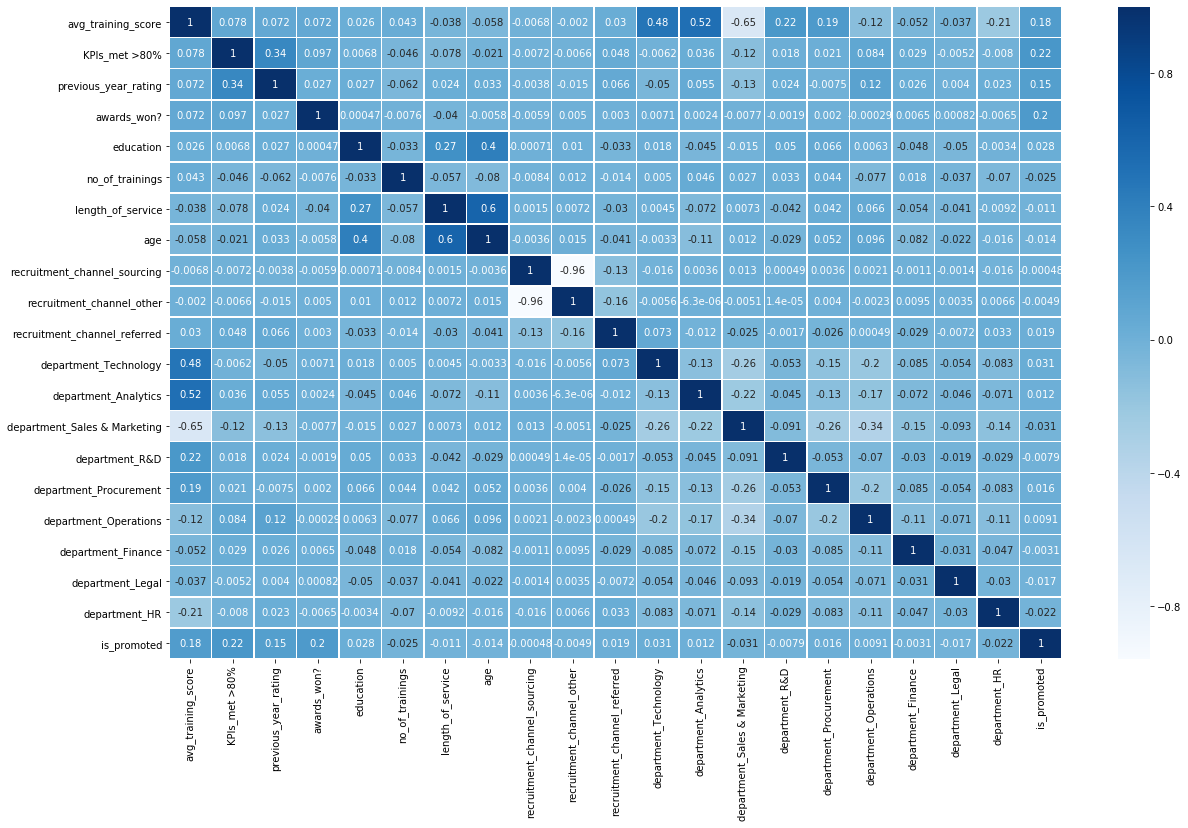

In [38]:
plt.figure(figsize=(20,12))

sns.heatmap(df_fs5.corr(),cmap='Blues',linewidth=0.5,annot=True);

In [39]:
df_fs5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
avg_training_score              54808 non-null int64
KPIs_met >80%                   54808 non-null int64
previous_year_rating            54808 non-null int64
awards_won?                     54808 non-null int64
education                       54808 non-null int64
no_of_trainings                 54808 non-null int64
length_of_service               54808 non-null int64
age                             54808 non-null int64
recruitment_channel_sourcing    54808 non-null uint8
recruitment_channel_other       54808 non-null uint8
recruitment_channel_referred    54808 non-null uint8
department_Technology           54808 non-null uint8
department_Analytics            54808 non-null uint8
department_Sales & Marketing    54808 non-null uint8
department_R&D                  54808 non-null uint8
department_Procurement          54808 non-null uint8
department_Operations           54808 non-n

### Checking wheather data is balanced or not

In [99]:
x_im=df_fs5.drop('is_promoted',axis=1)
y_im =df_fs5['is_promoted']

### Normalization and Modeling

In [100]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x_im, y_im,stratify=y_im,test_size=0.3, random_state=42)

In [101]:
from imblearn.under_sampling import RandomUnderSampler

In [102]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_im == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_im == 0)))

print("Shape of x_train: ", X_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Before OverSampling, counts of label '1': 4668
Before OverSampling, counts of label '0': 50140 

Shape of x_train:  (38365, 20)
Shape of x_test:  (16443, 20)
Shape of y_train:  (38365,)
Shape of y_test:  (16443,)


In [103]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38365, 20), (16443, 20), (38365,), (16443,))

In [104]:
class_weight = {0: 0.05,
                1: 0.95}

In [105]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
pipeline_scale_lgbm_tun= Pipeline([('poly', PolynomialFeatures(1)),
                                 ('scaler', StandardScaler()),
                                 ('classifier', lgb.LGBMClassifier(random_state=314,
                                                                   colsample_bytree=0.7916310138090942,
                                                                   min_child_samples=400,
                                                                   min_child_weight=0.001,
                                                                   num_leaves=11,
                                                                   reg_alpha=0.1, 
                                                                   reg_lambda=20,
                                                                   subsample=0.2064253891443727,
                                                                   metrics='f1',
                                                                   is_unbalance=True
                                                                  ))])

pipeline_scale_lgbm = Pipeline([('poly', PolynomialFeatures(1)),
                                 ('scaler', StandardScaler()),
                                 ('classifier', lgb.LGBMClassifier(random_state=0,metrics='f1',is_unbalance=True))])

pipeline_scale_logreg = Pipeline([('poly', PolynomialFeatures(1)),
                                   ('scaler', StandardScaler()),
                                   ('classifier', LogisticRegression(random_state=0,class_weight=class_weight,max_iter=1000))])

pipeline_scale_logreg_tun = Pipeline([('poly', PolynomialFeatures(3)),
                                   ('scaler', StandardScaler()),
                                   ('classifier', LogisticRegression(random_state=0,
                                                                     max_iter=2500,
                                                                     class_weight= {0: 0.381578947368421, 1: 0.618421052631579}))])

pipeline_scale_cb = Pipeline([('poly', PolynomialFeatures()),
                                ('scaler', StandardScaler()),
                               ('classifier', CatBoostClassifier(random_state=0, class_weights=class_weight))])

pipeline_scale_dt = Pipeline([('poly', PolynomialFeatures(1)),
                                ('scaler', StandardScaler()),
                               ('classifier', DecisionTreeClassifier(random_state=0, class_weight=class_weight))])

pipeline_scale_rf = Pipeline([('poly', PolynomialFeatures(1)),
                                ('scaler', StandardScaler()),
                               ('classifier', RandomForestClassifier(random_state=0, class_weight=class_weight))])

pipeline_scale_xgb = Pipeline([('poly', PolynomialFeatures()),
                                ('scaler', StandardScaler()),
                                ('classifier', XGBClassifier(random_state=0, scale_pos_weight=0.8))])


pipeline_scale_ab = Pipeline([('poly', PolynomialFeatures()),
                                ('scaler', StandardScaler()),
                               ('classifier', AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0))])

pipeline_scale_et = Pipeline([('poly', PolynomialFeatures()),
                                ('scaler', StandardScaler()),
                               ('classifier', ExtraTreesClassifier(random_state=0, class_weight=class_weight))])

"""
 {'colsample_bytree': 0.7916310138090942, 'min_child_samples': 400, 'min_child_weight': 0.001, 'num_leaves': 11,
 'reg_alpha': 0.1, 'reg_lambda': 20, 'subsample': 0.2064253891443727} 
"""

"\n {'colsample_bytree': 0.7916310138090942, 'min_child_samples': 400, 'min_child_weight': 0.001, 'num_leaves': 11,\n 'reg_alpha': 0.1, 'reg_lambda': 20, 'subsample': 0.2064253891443727} \n"

In [107]:
import joblib
import pickle

In [125]:
from sklearn.metrics import f1_score
def run_train(pipe_countvect):
    # Fit our data
    pipe_countvect.fit(X_train,y_train)
    
    scoring = {'accuracy': 'accuracy', 'precision':'precision', 
               'recall':'recall', 'roc_auc': 'roc_auc', 'f1':'f1'}
    
#     # 5 folds selected
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
#     validate = cross_validate(pipe_countvect, X_train, y_train, cv = cv, return_train_score=True)
#     print('cross validation score', validate)
    
    # 5 folds selected
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    # model = LogisticRegression(solver='liblinear')
    results = cross_validate(pipe_countvect, X_train,y_train, cv=kfold, return_train_score=True,
                             scoring=list(scoring.values()))
    print('K-fold cross-validation results:', results)
    
    print ("======================================================")
    
    for sc in range(len(scoring)):
        print(pipe_countvect.__class__.__name__+" average %s: %.3f (+/-%.3f)" % 
              (list(scoring.keys())[sc], results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))
    
    
#     filename = 'model_lgbm.pkl'
#     pickle.dump(pipe_countvect, open(filename, 'wb'))
    
#     waktu_train = validate['fit_time'].mean()
#     waktu_test = validate['score_time'].mean()
#     train_score = validate['train_score'].mean()
#     validate_score = validate['test_score'].mean()
#     print("====================")
#     print(waktu_train)
#     print(waktu_test)
#     print(train_score)
#     print(validate_score)
    
    test_prediction = pipe_countvect.predict(X_test)
    train_prediction = pipe_countvect.predict(X_train)
    
    prec_promoted = precision_score(y_test, test_prediction, pos_label=1)
    recall_promoted = recall_score(y_test, test_prediction, pos_label=1)
    
    f1_test_micro = f1_score(y_test, test_prediction)
    f1_train_micro = f1_score(y_train, train_prediction)
    f1_test_macro = f1_score(y_test, test_prediction, average='macro')
    f1_train_macro = f1_score(y_train, train_prediction, average='macro')
    auc_roc=metrics.roc_auc_score(y_test,test_prediction)
    
    print ("======================================================")
    print("==================Detail Evaluation===================")
    print("Accuracy_train: ",pipe_countvect.score(X_train,y_train))
    print("Accuracy_test: ",pipe_countvect.score(X_test,y_test))
    print("Precision for promoted label: {}".format(prec_promoted))
    print("Recall for promoted label: {}".format(recall_promoted))
    print("f1_train (mikro): ", f1_train_micro)
    print("f1_test (mikro): ", f1_test_micro)
    print("f1_train (makro): ", f1_train_macro)
    print("f1_test (makro): ", f1_test_macro)
    print("auc: ", auc_roc)
#     print("Accuracy: ", metrics.accuracy_score(y_test, test_prediction))
#     print("F1-score: ", metrics.f1_score(y_test, test_prediction))
    print("======================================================")
    print("===============Classification Report==================")
    report = classification_report(y_test, test_prediction)
    print(report)
    
    print("======================================================")
    print("=================Confusion Matrix=====================")
    conf = confusion_matrix(y_test, test_prediction)
    print(conf)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf, annot=labels, fmt='', cmap='Blues')
    
    print("======================================================")
    print("===============Precision Recall Curve=================")
#     y_score = pipe_countvect.decision_function(X_test)
    
    average_precision = average_precision_score(y_test, test_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))

    disp = plot_precision_recall_curve(pipe_countvect, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## 1. LGBM

K-fold cross-validation results: {'fit_time': array([0.23337555, 0.19647384, 0.24733782, 0.26229763, 0.19747114,
       0.2443459 , 0.21542287, 0.20146132, 0.19049048, 0.18849587]), 'score_time': array([0.03989339, 0.04089093, 0.04886889, 0.04886961, 0.03989315,
       0.03989339, 0.04089165, 0.03989244, 0.03989387, 0.04188848]), 'test_accuracy': array([0.72608809, 0.72035444, 0.73729476, 0.73442794, 0.73208236,
       0.72054223, 0.7411366 , 0.73800834, 0.73096976, 0.71976017]), 'train_accuracy': array([0.73221733, 0.7352873 , 0.73181186, 0.73140639, 0.73360751,
       0.72541921, 0.7325147 , 0.73642445, 0.73416548, 0.73245678]), 'test_precision': array([0.22112462, 0.23878437, 0.22570533, 0.22969838, 0.23565417,
       0.22378139, 0.25174825, 0.2373146 , 0.2265745 , 0.21523669]), 'train_precision': array([0.23467925, 0.23440034, 0.2344909 , 0.23411231, 0.2349209 ,
       0.23029953, 0.23234547, 0.23642582, 0.23518912, 0.23570045]), 'test_recall': array([0.91798107, 0.94017094, 0.9350

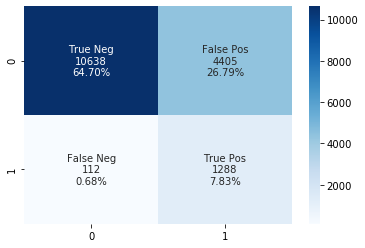

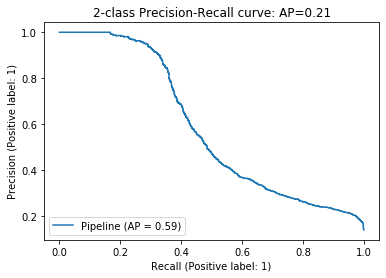

In [76]:
start = timer()

run_train(pipeline_scale_lgbm_tun)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

K-fold cross-validation results: {'fit_time': array([0.64006376, 0.59029722, 0.54638314, 0.57950473, 0.58261061,
       0.55863976, 0.58431435, 0.54158688, 0.51151633, 0.53296375]), 'score_time': array([0.13382244, 0.10070395, 0.11529279, 0.08272576, 0.09480882,
       0.09674668, 0.08793902, 0.07995129, 0.06946158, 0.09720302]), 'test_accuracy': array([0.75970811, 0.74745895, 0.77560594, 0.77299974, 0.75345322,
       0.75677789, 0.77033368, 0.76355579, 0.76277372, 0.75182482]), 'train_accuracy': array([0.77438601, 0.77722428, 0.77922266, 0.77551552, 0.77221386,
       0.77482696, 0.77589852, 0.77537722, 0.77294448, 0.77395812]), 'test_precision': array([0.23672759, 0.25      , 0.24748858, 0.25379803, 0.24813896,
       0.24129142, 0.27106864, 0.24846894, 0.24656357, 0.23198012]), 'train_precision': array([0.27029336, 0.27001252, 0.274451  , 0.27130749, 0.26761492,
       0.27006188, 0.26874401, 0.26999427, 0.26828344, 0.27047782]), 'test_recall': array([0.85804416, 0.88034188, 0.8798

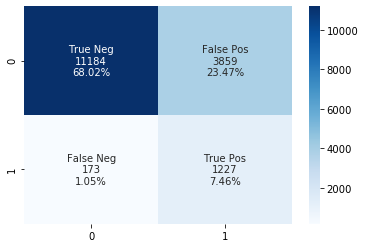

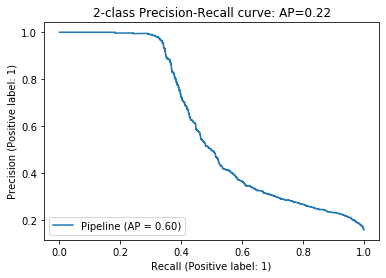

In [126]:
start = timer()

run_train(pipeline_scale_lgbm)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

In [96]:
filename = 'model_lgbm.pkl'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7547892720306514


In [78]:
import lightgbm as lgb

In [88]:
lgbm = lgb.LGBMClassifier(random_state=0, metrics='f1',is_unbalance=True)

lgbm.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': df_fs5.drop('is_promoted', axis=1).columns,
    'Importance': lgbm.feature_importances_})

importanceslgbm = importances.sort_values(by='Importance', ascending=False)
importanceslgbm = importances.set_index('Feature')
importanceslgbm

,Importance
Feature,
avg_training_score,905
KPIs_met >80%,168
previous_year_rating,270
awards_won?,63
education,104
no_of_trainings,126
length_of_service,515
age,128
recruitment_channel_sourcing,72


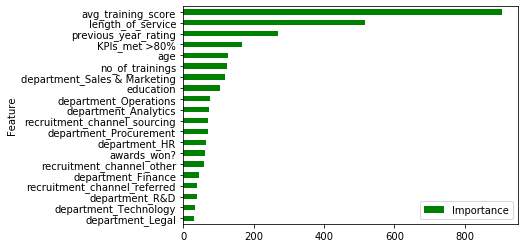

In [89]:
importanceslgbm.sort_values(by='Importance', ascending=True).plot(kind = "barh", color = "green");

In [82]:
lgbm = lgb.LGBMClassifier(random_state=314,metrics='f1',
                          is_unbalance=True,
                          colsample_bytree=0.7916310138090942,
                          min_child_samples=400,
                          min_child_weight=0.001,
                          num_leaves=11,
                          reg_alpha=0.1, 
                          reg_lambda=20,
                          subsample=0.2064253891443727)

lgbm.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': df_fs5.drop('is_promoted', axis=1).columns,
    'Importance': lgbm.feature_importances_})

importanceslgbm = importances.sort_values(by='Importance', ascending=False)
importanceslgbm = importances.set_index('Feature')
importanceslgbm

,Importance
Feature,
avg_training_score,312
KPIs_met >80%,106
previous_year_rating,112
awards_won?,34
education,28
no_of_trainings,12
length_of_service,81
age,46
recruitment_channel_sourcing,10


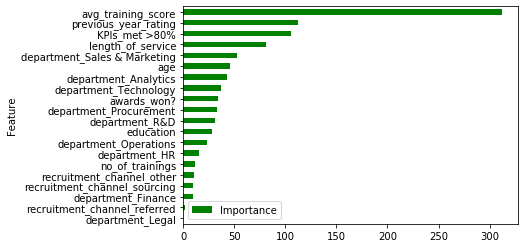

In [83]:
importanceslgbm.sort_values(by='Importance', ascending=True).plot(kind = "barh", color = "green");

#### optional after tuning

In [63]:
df_fs_tun_lgbm = df_fe[['avg_training_score','previous_year_rating','KPIs_met >80%','length_of_service','age','awards_won?',
                        'education','no_of_trainings','is_promoted']]

In [64]:
x_im_tun=df_fs_tun_lgbm.drop('is_promoted',axis=1)
y_im_tun=df_fs_tun_lgbm['is_promoted']

In [65]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x_im_tun, y_im_tun,stratify=y_im,test_size=0.3, random_state=42)

#### back to modelling process

K-fold cross-validation results: {'fit_time': array([0.4888618 , 0.54144835, 0.38277507, 0.44728398, 0.39276028,
       0.53055358, 0.4895432 , 0.40532708, 0.54486156, 0.38550806]), 'score_time': array([0.09953737, 0.09198642, 0.0924716 , 0.08916068, 0.11375165,
       0.07853889, 0.08669424, 0.09258986, 0.08736563, 0.09473801]), 'test_accuracy': array([0.62913735, 0.61767005, 0.65155069, 0.6426896 , 0.63851968,
       0.62591241, 0.65667362, 0.64937435, 0.64181439, 0.62669447]), 'train_accuracy': array([0.63617933, 0.63545528, 0.64069741, 0.6382646 , 0.64110287,
       0.63911495, 0.64508095, 0.64366185, 0.64227171, 0.63364129]), 'test_precision': array([0.17004773, 0.18114286, 0.17702448, 0.17819963, 0.17948718,
       0.17265763, 0.1958307 , 0.18402994, 0.17787286, 0.16637063]), 'train_precision': array([0.17965469, 0.17801012, 0.18143801, 0.17988459, 0.18065213,
       0.18018684, 0.18069324, 0.18088295, 0.18126356, 0.17921717]), 'test_recall': array([0.89905363, 0.9031339 , 0.9155

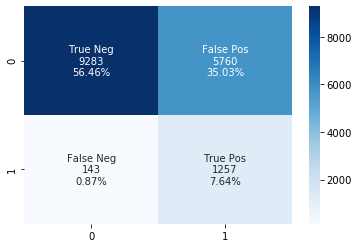

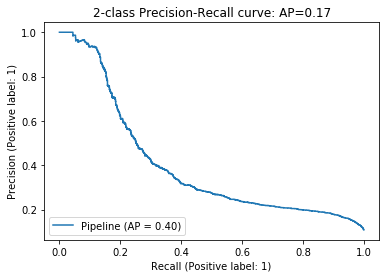

In [70]:
start = timer()

run_train(pipeline_scale_lgbm_tun)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

## 2. Logistic Regression

K-fold cross-validation results: {'fit_time': array([0.21797109, 0.24696231, 0.25745964, 0.2229929 , 0.23433852,
       0.25192261, 0.23374963, 0.19384956, 0.23739815, 0.25449705]), 'score_time': array([0.05431676, 0.05258799, 0.04980731, 0.05046487, 0.05088115,
       0.04950976, 0.05116224, 0.05156064, 0.05613351, 0.05169702]), 'test_accuracy': array([0.71279646, 0.69611676, 0.70940839, 0.71696638, 0.71201459,
       0.70516163, 0.72158498, 0.72158498, 0.70855057, 0.70072993]), 'train_accuracy': array([0.71049583, 0.71243628, 0.70971386, 0.70898981, 0.71043791,
       0.71088071, 0.71134409, 0.71056214, 0.70983811, 0.70911408]), 'test_precision': array([0.21287491, 0.22069911, 0.20782042, 0.21671598, 0.22133527,
       0.21199143, 0.23594675, 0.22700297, 0.21212121, 0.20254058]), 'train_precision': array([0.21758999, 0.21684704, 0.2174574 , 0.21640837, 0.21670809,
       0.21737734, 0.2158111 , 0.21627271, 0.21672943, 0.21773101]), 'test_recall': array([0.91798107, 0.91737892, 0.9318

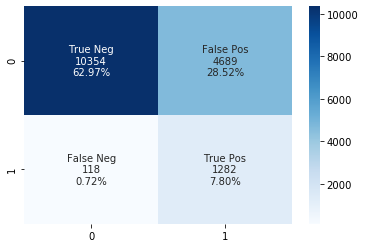

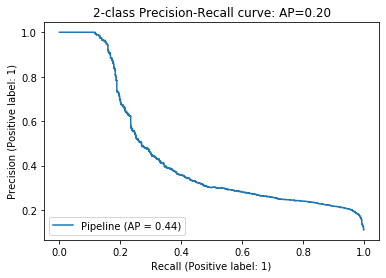

In [127]:
start = timer()

run_train(pipeline_scale_logreg)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

K-fold cross-validation results: {'fit_time': array([49.58942294, 50.3732214 , 49.87851691, 49.4157548 , 49.74088573,
       50.29739666, 45.87821889, 49.84261298, 48.11523533, 48.73258376]), 'score_time': array([0.2313807 , 0.2163918 , 0.22140837, 0.19647431, 0.18151283,
       0.18649983, 0.20944023, 0.1845057 , 0.17652917, 0.20644689]), 'test_accuracy': array([0.93692989, 0.93015377, 0.94162106, 0.9434454 , 0.93692989,
       0.93925965, 0.93274244, 0.93274244, 0.94082377, 0.94160584]), 'train_accuracy': array([0.94326344, 0.94410334, 0.9430607 , 0.94239458, 0.94300278,
       0.94291755, 0.94387327, 0.9436995 , 0.94274378, 0.94259897]), 'test_precision': array([0.79527559, 0.76433121, 0.78767123, 0.8410596 , 0.84172662,
       0.79738562, 0.80769231, 0.78461538, 0.79245283, 0.73964497]), 'train_precision': array([0.87125749, 0.87585682, 0.87034277, 0.85917603, 0.86339623,
       0.86441948, 0.87251908, 0.865243  , 0.86043059, 0.86631815]), 'test_recall': array([0.31861199, 0.341880

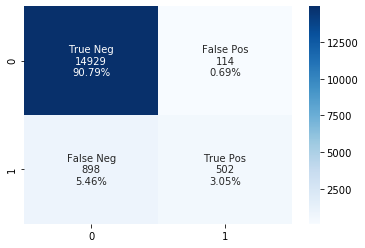

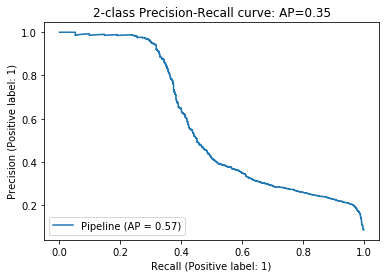

In [56]:
start = timer()

run_train(pipeline_scale_logreg_tun)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

## 3. CatBoost

Learning rate set to 0.048896
0:	learn: 0.6476795	total: 43.2ms	remaining: 43.2s
1:	learn: 0.6156209	total: 81.8ms	remaining: 40.8s
2:	learn: 0.5852263	total: 117ms	remaining: 38.9s
3:	learn: 0.5601763	total: 150ms	remaining: 37.4s
4:	learn: 0.5365952	total: 185ms	remaining: 36.8s
5:	learn: 0.5156504	total: 220ms	remaining: 36.5s
6:	learn: 0.4997177	total: 249ms	remaining: 35.3s
7:	learn: 0.4853603	total: 276ms	remaining: 34.3s
8:	learn: 0.4723843	total: 307ms	remaining: 33.8s
9:	learn: 0.4601641	total: 341ms	remaining: 33.8s
10:	learn: 0.4506416	total: 374ms	remaining: 33.6s
11:	learn: 0.4407108	total: 405ms	remaining: 33.3s
12:	learn: 0.4328369	total: 436ms	remaining: 33.1s
13:	learn: 0.4247604	total: 466ms	remaining: 32.8s
14:	learn: 0.4180376	total: 499ms	remaining: 32.8s
15:	learn: 0.4097500	total: 531ms	remaining: 32.7s
16:	learn: 0.4036526	total: 566ms	remaining: 32.7s
17:	learn: 0.3993010	total: 598ms	remaining: 32.6s
18:	learn: 0.3937974	total: 626ms	remaining: 32.3s
19:	learn

161:	learn: 0.3047892	total: 5.13s	remaining: 26.5s
162:	learn: 0.3046330	total: 5.16s	remaining: 26.5s
163:	learn: 0.3043857	total: 5.19s	remaining: 26.5s
164:	learn: 0.3040740	total: 5.22s	remaining: 26.4s
165:	learn: 0.3038852	total: 5.26s	remaining: 26.4s
166:	learn: 0.3037217	total: 5.3s	remaining: 26.4s
167:	learn: 0.3036320	total: 5.33s	remaining: 26.4s
168:	learn: 0.3034113	total: 5.36s	remaining: 26.4s
169:	learn: 0.3031933	total: 5.4s	remaining: 26.4s
170:	learn: 0.3030582	total: 5.43s	remaining: 26.3s
171:	learn: 0.3028813	total: 5.47s	remaining: 26.3s
172:	learn: 0.3027332	total: 5.5s	remaining: 26.3s
173:	learn: 0.3024791	total: 5.53s	remaining: 26.3s
174:	learn: 0.3023713	total: 5.56s	remaining: 26.2s
175:	learn: 0.3022322	total: 5.59s	remaining: 26.2s
176:	learn: 0.3019663	total: 5.63s	remaining: 26.2s
177:	learn: 0.3018488	total: 5.66s	remaining: 26.2s
178:	learn: 0.3016821	total: 5.7s	remaining: 26.1s
179:	learn: 0.3015270	total: 5.73s	remaining: 26.1s
180:	learn: 0.30

321:	learn: 0.2802490	total: 10.2s	remaining: 21.4s
322:	learn: 0.2802142	total: 10.2s	remaining: 21.3s
323:	learn: 0.2801901	total: 10.2s	remaining: 21.3s
324:	learn: 0.2799888	total: 10.2s	remaining: 21.3s
325:	learn: 0.2798557	total: 10.3s	remaining: 21.3s
326:	learn: 0.2797041	total: 10.3s	remaining: 21.2s
327:	learn: 0.2794911	total: 10.3s	remaining: 21.2s
328:	learn: 0.2792607	total: 10.4s	remaining: 21.2s
329:	learn: 0.2791351	total: 10.4s	remaining: 21.1s
330:	learn: 0.2789528	total: 10.4s	remaining: 21.1s
331:	learn: 0.2788324	total: 10.5s	remaining: 21.1s
332:	learn: 0.2786767	total: 10.5s	remaining: 21s
333:	learn: 0.2785541	total: 10.5s	remaining: 21s
334:	learn: 0.2784281	total: 10.6s	remaining: 21s
335:	learn: 0.2783573	total: 10.6s	remaining: 20.9s
336:	learn: 0.2782699	total: 10.6s	remaining: 20.9s
337:	learn: 0.2782191	total: 10.7s	remaining: 20.9s
338:	learn: 0.2781200	total: 10.7s	remaining: 20.8s
339:	learn: 0.2780418	total: 10.7s	remaining: 20.8s
340:	learn: 0.2780

483:	learn: 0.2648356	total: 15.2s	remaining: 16.2s
484:	learn: 0.2648343	total: 15.2s	remaining: 16.1s
485:	learn: 0.2647305	total: 15.2s	remaining: 16.1s
486:	learn: 0.2645910	total: 15.3s	remaining: 16.1s
487:	learn: 0.2644912	total: 15.3s	remaining: 16.1s
488:	learn: 0.2644318	total: 15.3s	remaining: 16s
489:	learn: 0.2643020	total: 15.4s	remaining: 16s
490:	learn: 0.2641712	total: 15.4s	remaining: 16s
491:	learn: 0.2641232	total: 15.4s	remaining: 15.9s
492:	learn: 0.2640378	total: 15.5s	remaining: 15.9s
493:	learn: 0.2639294	total: 15.5s	remaining: 15.9s
494:	learn: 0.2638037	total: 15.5s	remaining: 15.8s
495:	learn: 0.2637017	total: 15.6s	remaining: 15.8s
496:	learn: 0.2636239	total: 15.6s	remaining: 15.8s
497:	learn: 0.2634797	total: 15.6s	remaining: 15.7s
498:	learn: 0.2633809	total: 15.7s	remaining: 15.7s
499:	learn: 0.2632588	total: 15.7s	remaining: 15.7s
500:	learn: 0.2631786	total: 15.7s	remaining: 15.7s
501:	learn: 0.2631311	total: 15.7s	remaining: 15.6s
502:	learn: 0.2630

645:	learn: 0.2507418	total: 20.3s	remaining: 11.1s
646:	learn: 0.2506685	total: 20.3s	remaining: 11.1s
647:	learn: 0.2505576	total: 20.4s	remaining: 11.1s
648:	learn: 0.2503966	total: 20.4s	remaining: 11s
649:	learn: 0.2503318	total: 20.4s	remaining: 11s
650:	learn: 0.2502956	total: 20.5s	remaining: 11s
651:	learn: 0.2502192	total: 20.5s	remaining: 10.9s
652:	learn: 0.2501148	total: 20.5s	remaining: 10.9s
653:	learn: 0.2500226	total: 20.6s	remaining: 10.9s
654:	learn: 0.2498955	total: 20.6s	remaining: 10.8s
655:	learn: 0.2498341	total: 20.6s	remaining: 10.8s
656:	learn: 0.2498086	total: 20.7s	remaining: 10.8s
657:	learn: 0.2497328	total: 20.7s	remaining: 10.8s
658:	learn: 0.2496756	total: 20.7s	remaining: 10.7s
659:	learn: 0.2495916	total: 20.8s	remaining: 10.7s
660:	learn: 0.2495319	total: 20.8s	remaining: 10.7s
661:	learn: 0.2494327	total: 20.9s	remaining: 10.6s
662:	learn: 0.2493789	total: 20.9s	remaining: 10.6s
663:	learn: 0.2493026	total: 20.9s	remaining: 10.6s
664:	learn: 0.2492

805:	learn: 0.2385982	total: 25.4s	remaining: 6.13s
806:	learn: 0.2385283	total: 25.5s	remaining: 6.09s
807:	learn: 0.2384456	total: 25.5s	remaining: 6.06s
808:	learn: 0.2383898	total: 25.5s	remaining: 6.03s
809:	learn: 0.2383204	total: 25.6s	remaining: 6s
810:	learn: 0.2382772	total: 25.6s	remaining: 5.96s
811:	learn: 0.2382274	total: 25.6s	remaining: 5.93s
812:	learn: 0.2381621	total: 25.6s	remaining: 5.9s
813:	learn: 0.2381113	total: 25.7s	remaining: 5.87s
814:	learn: 0.2380247	total: 25.7s	remaining: 5.83s
815:	learn: 0.2379439	total: 25.7s	remaining: 5.8s
816:	learn: 0.2378570	total: 25.8s	remaining: 5.77s
817:	learn: 0.2377591	total: 25.8s	remaining: 5.74s
818:	learn: 0.2376935	total: 25.8s	remaining: 5.71s
819:	learn: 0.2376654	total: 25.9s	remaining: 5.68s
820:	learn: 0.2376598	total: 25.9s	remaining: 5.65s
821:	learn: 0.2375846	total: 25.9s	remaining: 5.61s
822:	learn: 0.2375441	total: 26s	remaining: 5.58s
823:	learn: 0.2374772	total: 26s	remaining: 5.55s
824:	learn: 0.2374083

965:	learn: 0.2292689	total: 30.4s	remaining: 1.07s
966:	learn: 0.2291961	total: 30.5s	remaining: 1.04s
967:	learn: 0.2291088	total: 30.5s	remaining: 1.01s
968:	learn: 0.2290425	total: 30.5s	remaining: 977ms
969:	learn: 0.2290033	total: 30.6s	remaining: 945ms
970:	learn: 0.2288984	total: 30.6s	remaining: 914ms
971:	learn: 0.2288578	total: 30.6s	remaining: 882ms
972:	learn: 0.2287557	total: 30.7s	remaining: 851ms
973:	learn: 0.2286995	total: 30.7s	remaining: 819ms
974:	learn: 0.2286276	total: 30.7s	remaining: 787ms
975:	learn: 0.2285865	total: 30.7s	remaining: 756ms
976:	learn: 0.2285636	total: 30.8s	remaining: 724ms
977:	learn: 0.2285636	total: 30.8s	remaining: 693ms
978:	learn: 0.2285076	total: 30.8s	remaining: 661ms
979:	learn: 0.2284360	total: 30.9s	remaining: 630ms
980:	learn: 0.2283962	total: 30.9s	remaining: 598ms
981:	learn: 0.2283239	total: 30.9s	remaining: 567ms
982:	learn: 0.2282813	total: 30.9s	remaining: 535ms
983:	learn: 0.2281960	total: 31s	remaining: 504ms
984:	learn: 0.

125:	learn: 0.3101529	total: 3.94s	remaining: 27.3s
126:	learn: 0.3099387	total: 3.96s	remaining: 27.2s
127:	learn: 0.3094156	total: 3.99s	remaining: 27.2s
128:	learn: 0.3091212	total: 4.02s	remaining: 27.1s
129:	learn: 0.3089670	total: 4.05s	remaining: 27.1s
130:	learn: 0.3086921	total: 4.08s	remaining: 27.1s
131:	learn: 0.3085314	total: 4.11s	remaining: 27s
132:	learn: 0.3081990	total: 4.14s	remaining: 27s
133:	learn: 0.3079345	total: 4.16s	remaining: 26.9s
134:	learn: 0.3077326	total: 4.2s	remaining: 26.9s
135:	learn: 0.3073936	total: 4.23s	remaining: 26.9s
136:	learn: 0.3072497	total: 4.26s	remaining: 26.8s
137:	learn: 0.3071357	total: 4.29s	remaining: 26.8s
138:	learn: 0.3069279	total: 4.32s	remaining: 26.8s
139:	learn: 0.3067597	total: 4.36s	remaining: 26.8s
140:	learn: 0.3066302	total: 4.39s	remaining: 26.8s
141:	learn: 0.3064285	total: 4.42s	remaining: 26.7s
142:	learn: 0.3062742	total: 4.45s	remaining: 26.7s
143:	learn: 0.3059602	total: 4.48s	remaining: 26.6s
144:	learn: 0.305

288:	learn: 0.2810698	total: 9.16s	remaining: 22.5s
289:	learn: 0.2808942	total: 9.18s	remaining: 22.5s
290:	learn: 0.2807321	total: 9.21s	remaining: 22.4s
291:	learn: 0.2806703	total: 9.24s	remaining: 22.4s
292:	learn: 0.2805456	total: 9.27s	remaining: 22.4s
293:	learn: 0.2803820	total: 9.31s	remaining: 22.3s
294:	learn: 0.2802695	total: 9.35s	remaining: 22.3s
295:	learn: 0.2802682	total: 9.38s	remaining: 22.3s
296:	learn: 0.2801551	total: 9.42s	remaining: 22.3s
297:	learn: 0.2800452	total: 9.46s	remaining: 22.3s
298:	learn: 0.2799291	total: 9.49s	remaining: 22.3s
299:	learn: 0.2797425	total: 9.52s	remaining: 22.2s
300:	learn: 0.2795180	total: 9.58s	remaining: 22.3s
301:	learn: 0.2793704	total: 9.62s	remaining: 22.2s
302:	learn: 0.2792419	total: 9.65s	remaining: 22.2s
303:	learn: 0.2791551	total: 9.69s	remaining: 22.2s
304:	learn: 0.2790487	total: 9.72s	remaining: 22.1s
305:	learn: 0.2789715	total: 9.74s	remaining: 22.1s
306:	learn: 0.2788935	total: 9.78s	remaining: 22.1s
307:	learn: 

448:	learn: 0.2643888	total: 14.3s	remaining: 17.5s
449:	learn: 0.2642927	total: 14.3s	remaining: 17.5s
450:	learn: 0.2642218	total: 14.3s	remaining: 17.4s
451:	learn: 0.2640224	total: 14.4s	remaining: 17.4s
452:	learn: 0.2638632	total: 14.4s	remaining: 17.4s
453:	learn: 0.2637333	total: 14.4s	remaining: 17.3s
454:	learn: 0.2636181	total: 14.5s	remaining: 17.3s
455:	learn: 0.2634809	total: 14.5s	remaining: 17.3s
456:	learn: 0.2633843	total: 14.5s	remaining: 17.2s
457:	learn: 0.2632983	total: 14.5s	remaining: 17.2s
458:	learn: 0.2631974	total: 14.6s	remaining: 17.2s
459:	learn: 0.2630511	total: 14.6s	remaining: 17.1s
460:	learn: 0.2629324	total: 14.6s	remaining: 17.1s
461:	learn: 0.2628003	total: 14.7s	remaining: 17.1s
462:	learn: 0.2627472	total: 14.7s	remaining: 17s
463:	learn: 0.2626161	total: 14.7s	remaining: 17s
464:	learn: 0.2624855	total: 14.8s	remaining: 17s
465:	learn: 0.2623861	total: 14.8s	remaining: 16.9s
466:	learn: 0.2622934	total: 14.8s	remaining: 16.9s
467:	learn: 0.2621

610:	learn: 0.2498412	total: 19.3s	remaining: 12.3s
611:	learn: 0.2497749	total: 19.3s	remaining: 12.2s
612:	learn: 0.2496763	total: 19.3s	remaining: 12.2s
613:	learn: 0.2496015	total: 19.3s	remaining: 12.2s
614:	learn: 0.2494721	total: 19.4s	remaining: 12.1s
615:	learn: 0.2493998	total: 19.4s	remaining: 12.1s
616:	learn: 0.2492913	total: 19.4s	remaining: 12.1s
617:	learn: 0.2492164	total: 19.5s	remaining: 12s
618:	learn: 0.2491253	total: 19.5s	remaining: 12s
619:	learn: 0.2490695	total: 19.5s	remaining: 12s
620:	learn: 0.2489772	total: 19.6s	remaining: 11.9s
621:	learn: 0.2489181	total: 19.6s	remaining: 11.9s
622:	learn: 0.2488252	total: 19.6s	remaining: 11.9s
623:	learn: 0.2487806	total: 19.7s	remaining: 11.8s
624:	learn: 0.2487176	total: 19.7s	remaining: 11.8s
625:	learn: 0.2486204	total: 19.7s	remaining: 11.8s
626:	learn: 0.2485623	total: 19.8s	remaining: 11.8s
627:	learn: 0.2485159	total: 19.8s	remaining: 11.7s
628:	learn: 0.2484434	total: 19.8s	remaining: 11.7s
629:	learn: 0.2483

770:	learn: 0.2369149	total: 24.3s	remaining: 7.2s
771:	learn: 0.2368764	total: 24.3s	remaining: 7.17s
772:	learn: 0.2367770	total: 24.3s	remaining: 7.14s
773:	learn: 0.2366976	total: 24.3s	remaining: 7.11s
774:	learn: 0.2365469	total: 24.4s	remaining: 7.08s
775:	learn: 0.2365090	total: 24.4s	remaining: 7.04s
776:	learn: 0.2363933	total: 24.4s	remaining: 7.01s
777:	learn: 0.2363313	total: 24.5s	remaining: 6.98s
778:	learn: 0.2362857	total: 24.5s	remaining: 6.95s
779:	learn: 0.2362192	total: 24.5s	remaining: 6.92s
780:	learn: 0.2361436	total: 24.6s	remaining: 6.89s
781:	learn: 0.2360512	total: 24.6s	remaining: 6.86s
782:	learn: 0.2359532	total: 24.6s	remaining: 6.82s
783:	learn: 0.2358271	total: 24.7s	remaining: 6.79s
784:	learn: 0.2357151	total: 24.7s	remaining: 6.76s
785:	learn: 0.2356922	total: 24.7s	remaining: 6.73s
786:	learn: 0.2355650	total: 24.8s	remaining: 6.7s
787:	learn: 0.2354592	total: 24.8s	remaining: 6.67s
788:	learn: 0.2353029	total: 24.8s	remaining: 6.64s
789:	learn: 0.

931:	learn: 0.2256087	total: 29.2s	remaining: 2.13s
932:	learn: 0.2255623	total: 29.3s	remaining: 2.1s
933:	learn: 0.2254949	total: 29.3s	remaining: 2.07s
934:	learn: 0.2253538	total: 29.3s	remaining: 2.04s
935:	learn: 0.2252883	total: 29.4s	remaining: 2.01s
936:	learn: 0.2252499	total: 29.4s	remaining: 1.98s
937:	learn: 0.2252036	total: 29.4s	remaining: 1.94s
938:	learn: 0.2251301	total: 29.5s	remaining: 1.91s
939:	learn: 0.2250096	total: 29.5s	remaining: 1.88s
940:	learn: 0.2249822	total: 29.5s	remaining: 1.85s
941:	learn: 0.2248885	total: 29.6s	remaining: 1.82s
942:	learn: 0.2248512	total: 29.6s	remaining: 1.79s
943:	learn: 0.2247696	total: 29.6s	remaining: 1.76s
944:	learn: 0.2247047	total: 29.7s	remaining: 1.73s
945:	learn: 0.2246687	total: 29.7s	remaining: 1.69s
946:	learn: 0.2245825	total: 29.7s	remaining: 1.66s
947:	learn: 0.2245420	total: 29.8s	remaining: 1.63s
948:	learn: 0.2244986	total: 29.8s	remaining: 1.6s
949:	learn: 0.2244419	total: 29.8s	remaining: 1.57s
950:	learn: 0.

92:	learn: 0.3224620	total: 2.89s	remaining: 28.2s
93:	learn: 0.3221813	total: 2.93s	remaining: 28.2s
94:	learn: 0.3219030	total: 2.96s	remaining: 28.2s
95:	learn: 0.3210400	total: 2.99s	remaining: 28.2s
96:	learn: 0.3208113	total: 3.02s	remaining: 28.2s
97:	learn: 0.3205897	total: 3.06s	remaining: 28.1s
98:	learn: 0.3203006	total: 3.09s	remaining: 28.1s
99:	learn: 0.3199811	total: 3.13s	remaining: 28.1s
100:	learn: 0.3196542	total: 3.16s	remaining: 28.1s
101:	learn: 0.3194801	total: 3.19s	remaining: 28.1s
102:	learn: 0.3192626	total: 3.23s	remaining: 28.1s
103:	learn: 0.3186968	total: 3.26s	remaining: 28.1s
104:	learn: 0.3182419	total: 3.29s	remaining: 28.1s
105:	learn: 0.3180456	total: 3.32s	remaining: 28s
106:	learn: 0.3177863	total: 3.36s	remaining: 28s
107:	learn: 0.3174847	total: 3.39s	remaining: 28s
108:	learn: 0.3172906	total: 3.42s	remaining: 27.9s
109:	learn: 0.3170370	total: 3.45s	remaining: 27.9s
110:	learn: 0.3167766	total: 3.48s	remaining: 27.9s
111:	learn: 0.3164988	tota

256:	learn: 0.2888462	total: 8.16s	remaining: 23.6s
257:	learn: 0.2886892	total: 8.19s	remaining: 23.5s
258:	learn: 0.2885091	total: 8.22s	remaining: 23.5s
259:	learn: 0.2883177	total: 8.25s	remaining: 23.5s
260:	learn: 0.2881480	total: 8.28s	remaining: 23.5s
261:	learn: 0.2879393	total: 8.32s	remaining: 23.4s
262:	learn: 0.2877685	total: 8.35s	remaining: 23.4s
263:	learn: 0.2875729	total: 8.38s	remaining: 23.4s
264:	learn: 0.2874176	total: 8.44s	remaining: 23.4s
265:	learn: 0.2871467	total: 8.49s	remaining: 23.4s
266:	learn: 0.2870303	total: 8.53s	remaining: 23.4s
267:	learn: 0.2869633	total: 8.56s	remaining: 23.4s
268:	learn: 0.2868705	total: 8.59s	remaining: 23.3s
269:	learn: 0.2866641	total: 8.61s	remaining: 23.3s
270:	learn: 0.2864462	total: 8.64s	remaining: 23.3s
271:	learn: 0.2862998	total: 8.68s	remaining: 23.2s
272:	learn: 0.2861493	total: 8.71s	remaining: 23.2s
273:	learn: 0.2860532	total: 8.74s	remaining: 23.2s
274:	learn: 0.2858804	total: 8.77s	remaining: 23.1s
275:	learn: 

418:	learn: 0.2687453	total: 13.2s	remaining: 18.3s
419:	learn: 0.2686355	total: 13.3s	remaining: 18.3s
420:	learn: 0.2686214	total: 13.3s	remaining: 18.3s
421:	learn: 0.2685447	total: 13.3s	remaining: 18.2s
422:	learn: 0.2684623	total: 13.3s	remaining: 18.2s
423:	learn: 0.2684085	total: 13.4s	remaining: 18.2s
424:	learn: 0.2683407	total: 13.4s	remaining: 18.1s
425:	learn: 0.2681838	total: 13.4s	remaining: 18.1s
426:	learn: 0.2680973	total: 13.5s	remaining: 18.1s
427:	learn: 0.2680019	total: 13.5s	remaining: 18s
428:	learn: 0.2679664	total: 13.5s	remaining: 18s
429:	learn: 0.2679651	total: 13.5s	remaining: 18s
430:	learn: 0.2678590	total: 13.6s	remaining: 17.9s
431:	learn: 0.2677448	total: 13.6s	remaining: 17.9s
432:	learn: 0.2676949	total: 13.6s	remaining: 17.9s
433:	learn: 0.2675330	total: 13.7s	remaining: 17.8s
434:	learn: 0.2674828	total: 13.7s	remaining: 17.8s
435:	learn: 0.2674427	total: 13.7s	remaining: 17.8s
436:	learn: 0.2673643	total: 13.8s	remaining: 17.7s
437:	learn: 0.2671

581:	learn: 0.2529779	total: 18.2s	remaining: 13.1s
582:	learn: 0.2528437	total: 18.2s	remaining: 13s
583:	learn: 0.2526759	total: 18.2s	remaining: 13s
584:	learn: 0.2525575	total: 18.3s	remaining: 13s
585:	learn: 0.2525200	total: 18.3s	remaining: 12.9s
586:	learn: 0.2524519	total: 18.3s	remaining: 12.9s
587:	learn: 0.2523807	total: 18.4s	remaining: 12.9s
588:	learn: 0.2522236	total: 18.4s	remaining: 12.8s
589:	learn: 0.2521205	total: 18.4s	remaining: 12.8s
590:	learn: 0.2521188	total: 18.4s	remaining: 12.8s
591:	learn: 0.2520278	total: 18.5s	remaining: 12.7s
592:	learn: 0.2519838	total: 18.5s	remaining: 12.7s
593:	learn: 0.2518917	total: 18.5s	remaining: 12.7s
594:	learn: 0.2518068	total: 18.6s	remaining: 12.6s
595:	learn: 0.2517078	total: 18.6s	remaining: 12.6s
596:	learn: 0.2516020	total: 18.6s	remaining: 12.6s
597:	learn: 0.2515543	total: 18.6s	remaining: 12.5s
598:	learn: 0.2514733	total: 18.7s	remaining: 12.5s
599:	learn: 0.2514143	total: 18.7s	remaining: 12.5s
600:	learn: 0.2513

740:	learn: 0.2393939	total: 23s	remaining: 8.03s
741:	learn: 0.2393093	total: 23s	remaining: 8s
742:	learn: 0.2392495	total: 23s	remaining: 7.97s
743:	learn: 0.2392306	total: 23.1s	remaining: 7.94s
744:	learn: 0.2391990	total: 23.1s	remaining: 7.91s
745:	learn: 0.2390506	total: 23.1s	remaining: 7.88s
746:	learn: 0.2389402	total: 23.2s	remaining: 7.84s
747:	learn: 0.2388758	total: 23.2s	remaining: 7.81s
748:	learn: 0.2388137	total: 23.2s	remaining: 7.78s
749:	learn: 0.2387392	total: 23.3s	remaining: 7.75s
750:	learn: 0.2386194	total: 23.3s	remaining: 7.72s
751:	learn: 0.2385896	total: 23.3s	remaining: 7.69s
752:	learn: 0.2384838	total: 23.3s	remaining: 7.66s
753:	learn: 0.2384181	total: 23.4s	remaining: 7.63s
754:	learn: 0.2383453	total: 23.4s	remaining: 7.59s
755:	learn: 0.2382923	total: 23.4s	remaining: 7.56s
756:	learn: 0.2382464	total: 23.5s	remaining: 7.53s
757:	learn: 0.2381666	total: 23.5s	remaining: 7.5s
758:	learn: 0.2380688	total: 23.5s	remaining: 7.47s
759:	learn: 0.2380003	

904:	learn: 0.2274365	total: 28s	remaining: 2.94s
905:	learn: 0.2273720	total: 28s	remaining: 2.91s
906:	learn: 0.2273094	total: 28.1s	remaining: 2.88s
907:	learn: 0.2272083	total: 28.1s	remaining: 2.85s
908:	learn: 0.2271318	total: 28.1s	remaining: 2.81s
909:	learn: 0.2270779	total: 28.1s	remaining: 2.78s
910:	learn: 0.2270356	total: 28.2s	remaining: 2.75s
911:	learn: 0.2269179	total: 28.2s	remaining: 2.72s
912:	learn: 0.2268808	total: 28.2s	remaining: 2.69s
913:	learn: 0.2268480	total: 28.3s	remaining: 2.66s
914:	learn: 0.2267786	total: 28.3s	remaining: 2.63s
915:	learn: 0.2267272	total: 28.3s	remaining: 2.6s
916:	learn: 0.2266920	total: 28.4s	remaining: 2.57s
917:	learn: 0.2266586	total: 28.4s	remaining: 2.54s
918:	learn: 0.2265903	total: 28.4s	remaining: 2.51s
919:	learn: 0.2265753	total: 28.5s	remaining: 2.48s
920:	learn: 0.2265056	total: 28.5s	remaining: 2.44s
921:	learn: 0.2264678	total: 28.5s	remaining: 2.41s
922:	learn: 0.2264172	total: 28.6s	remaining: 2.38s
923:	learn: 0.226

65:	learn: 0.3313429	total: 1.9s	remaining: 26.8s
66:	learn: 0.3309927	total: 1.92s	remaining: 26.8s
67:	learn: 0.3305799	total: 1.96s	remaining: 26.8s
68:	learn: 0.3302397	total: 1.99s	remaining: 26.8s
69:	learn: 0.3296354	total: 2.02s	remaining: 26.8s
70:	learn: 0.3292914	total: 2.05s	remaining: 26.9s
71:	learn: 0.3289721	total: 2.08s	remaining: 26.8s
72:	learn: 0.3286047	total: 2.11s	remaining: 26.8s
73:	learn: 0.3279816	total: 2.14s	remaining: 26.8s
74:	learn: 0.3277281	total: 2.17s	remaining: 26.8s
75:	learn: 0.3272726	total: 2.2s	remaining: 26.8s
76:	learn: 0.3269927	total: 2.23s	remaining: 26.8s
77:	learn: 0.3267923	total: 2.26s	remaining: 26.7s
78:	learn: 0.3264941	total: 2.29s	remaining: 26.6s
79:	learn: 0.3262316	total: 2.32s	remaining: 26.7s
80:	learn: 0.3259357	total: 2.35s	remaining: 26.7s
81:	learn: 0.3256438	total: 2.38s	remaining: 26.7s
82:	learn: 0.3252850	total: 2.41s	remaining: 26.7s
83:	learn: 0.3250937	total: 2.44s	remaining: 26.7s
84:	learn: 0.3244994	total: 2.47s

227:	learn: 0.2938406	total: 6.77s	remaining: 22.9s
228:	learn: 0.2937690	total: 6.8s	remaining: 22.9s
229:	learn: 0.2936256	total: 6.83s	remaining: 22.9s
230:	learn: 0.2935245	total: 6.86s	remaining: 22.8s
231:	learn: 0.2933893	total: 6.89s	remaining: 22.8s
232:	learn: 0.2932226	total: 6.93s	remaining: 22.8s
233:	learn: 0.2930798	total: 6.96s	remaining: 22.8s
234:	learn: 0.2929360	total: 6.99s	remaining: 22.7s
235:	learn: 0.2928231	total: 7.01s	remaining: 22.7s
236:	learn: 0.2926859	total: 7.04s	remaining: 22.7s
237:	learn: 0.2925891	total: 7.07s	remaining: 22.6s
238:	learn: 0.2924348	total: 7.1s	remaining: 22.6s
239:	learn: 0.2922976	total: 7.13s	remaining: 22.6s
240:	learn: 0.2920698	total: 7.16s	remaining: 22.6s
241:	learn: 0.2918985	total: 7.19s	remaining: 22.5s
242:	learn: 0.2917671	total: 7.22s	remaining: 22.5s
243:	learn: 0.2915266	total: 7.25s	remaining: 22.5s
244:	learn: 0.2913219	total: 7.28s	remaining: 22.4s
245:	learn: 0.2909580	total: 7.31s	remaining: 22.4s
246:	learn: 0.

387:	learn: 0.2739062	total: 11.6s	remaining: 18.2s
388:	learn: 0.2738337	total: 11.6s	remaining: 18.2s
389:	learn: 0.2737755	total: 11.6s	remaining: 18.2s
390:	learn: 0.2736114	total: 11.6s	remaining: 18.1s
391:	learn: 0.2735082	total: 11.7s	remaining: 18.1s
392:	learn: 0.2733602	total: 11.7s	remaining: 18.1s
393:	learn: 0.2732321	total: 11.7s	remaining: 18.1s
394:	learn: 0.2730781	total: 11.8s	remaining: 18s
395:	learn: 0.2729844	total: 11.8s	remaining: 18s
396:	learn: 0.2729531	total: 11.8s	remaining: 18s
397:	learn: 0.2727569	total: 11.9s	remaining: 17.9s
398:	learn: 0.2726466	total: 11.9s	remaining: 17.9s
399:	learn: 0.2724980	total: 11.9s	remaining: 17.9s
400:	learn: 0.2723424	total: 12s	remaining: 17.9s
401:	learn: 0.2723327	total: 12s	remaining: 17.8s
402:	learn: 0.2722716	total: 12s	remaining: 17.8s
403:	learn: 0.2722686	total: 12s	remaining: 17.8s
404:	learn: 0.2722564	total: 12.1s	remaining: 17.7s
405:	learn: 0.2721146	total: 12.1s	remaining: 17.7s
406:	learn: 0.2720117	tota

548:	learn: 0.2583457	total: 16.4s	remaining: 13.5s
549:	learn: 0.2582272	total: 16.4s	remaining: 13.4s
550:	learn: 0.2581812	total: 16.5s	remaining: 13.4s
551:	learn: 0.2580543	total: 16.5s	remaining: 13.4s
552:	learn: 0.2580256	total: 16.5s	remaining: 13.4s
553:	learn: 0.2579169	total: 16.5s	remaining: 13.3s
554:	learn: 0.2578381	total: 16.6s	remaining: 13.3s
555:	learn: 0.2577145	total: 16.6s	remaining: 13.3s
556:	learn: 0.2575659	total: 16.6s	remaining: 13.2s
557:	learn: 0.2574444	total: 16.7s	remaining: 13.2s
558:	learn: 0.2573316	total: 16.7s	remaining: 13.2s
559:	learn: 0.2572186	total: 16.7s	remaining: 13.2s
560:	learn: 0.2571730	total: 16.8s	remaining: 13.1s
561:	learn: 0.2570850	total: 16.8s	remaining: 13.1s
562:	learn: 0.2570252	total: 16.8s	remaining: 13.1s
563:	learn: 0.2570094	total: 16.9s	remaining: 13s
564:	learn: 0.2568920	total: 16.9s	remaining: 13s
565:	learn: 0.2568172	total: 16.9s	remaining: 13s
566:	learn: 0.2567480	total: 16.9s	remaining: 12.9s
567:	learn: 0.2566

711:	learn: 0.2447270	total: 21.4s	remaining: 8.64s
712:	learn: 0.2446263	total: 21.4s	remaining: 8.62s
713:	learn: 0.2445655	total: 21.4s	remaining: 8.59s
714:	learn: 0.2444624	total: 21.5s	remaining: 8.56s
715:	learn: 0.2443635	total: 21.5s	remaining: 8.53s
716:	learn: 0.2442875	total: 21.5s	remaining: 8.5s
717:	learn: 0.2442118	total: 21.6s	remaining: 8.47s
718:	learn: 0.2441422	total: 21.6s	remaining: 8.44s
719:	learn: 0.2440479	total: 21.6s	remaining: 8.41s
720:	learn: 0.2438977	total: 21.6s	remaining: 8.38s
721:	learn: 0.2438154	total: 21.7s	remaining: 8.35s
722:	learn: 0.2437756	total: 21.7s	remaining: 8.31s
723:	learn: 0.2436821	total: 21.7s	remaining: 8.29s
724:	learn: 0.2435861	total: 21.8s	remaining: 8.25s
725:	learn: 0.2434818	total: 21.8s	remaining: 8.22s
726:	learn: 0.2433880	total: 21.8s	remaining: 8.19s
727:	learn: 0.2433287	total: 21.9s	remaining: 8.16s
728:	learn: 0.2433287	total: 21.9s	remaining: 8.13s
729:	learn: 0.2432603	total: 21.9s	remaining: 8.1s
730:	learn: 0.

873:	learn: 0.2318721	total: 26.2s	remaining: 3.78s
874:	learn: 0.2318241	total: 26.2s	remaining: 3.75s
875:	learn: 0.2317436	total: 26.3s	remaining: 3.72s
876:	learn: 0.2316671	total: 26.3s	remaining: 3.69s
877:	learn: 0.2315622	total: 26.3s	remaining: 3.66s
878:	learn: 0.2314548	total: 26.4s	remaining: 3.63s
879:	learn: 0.2314053	total: 26.4s	remaining: 3.6s
880:	learn: 0.2313579	total: 26.4s	remaining: 3.57s
881:	learn: 0.2312506	total: 26.4s	remaining: 3.54s
882:	learn: 0.2312506	total: 26.5s	remaining: 3.51s
883:	learn: 0.2312013	total: 26.5s	remaining: 3.48s
884:	learn: 0.2311355	total: 26.5s	remaining: 3.45s
885:	learn: 0.2311155	total: 26.6s	remaining: 3.42s
886:	learn: 0.2310630	total: 26.6s	remaining: 3.39s
887:	learn: 0.2309877	total: 26.6s	remaining: 3.36s
888:	learn: 0.2309355	total: 26.6s	remaining: 3.33s
889:	learn: 0.2308849	total: 26.7s	remaining: 3.3s
890:	learn: 0.2307176	total: 26.7s	remaining: 3.27s
891:	learn: 0.2306010	total: 26.7s	remaining: 3.24s
892:	learn: 0.

38:	learn: 0.3503011	total: 1.21s	remaining: 29.8s
39:	learn: 0.3489228	total: 1.24s	remaining: 29.6s
40:	learn: 0.3475920	total: 1.26s	remaining: 29.6s
41:	learn: 0.3467122	total: 1.3s	remaining: 29.6s
42:	learn: 0.3459081	total: 1.33s	remaining: 29.5s
43:	learn: 0.3451433	total: 1.36s	remaining: 29.5s
44:	learn: 0.3445970	total: 1.39s	remaining: 29.5s
45:	learn: 0.3432790	total: 1.43s	remaining: 29.6s
46:	learn: 0.3423333	total: 1.45s	remaining: 29.5s
47:	learn: 0.3418099	total: 1.48s	remaining: 29.4s
48:	learn: 0.3401759	total: 1.51s	remaining: 29.3s
49:	learn: 0.3395598	total: 1.54s	remaining: 29.2s
50:	learn: 0.3390532	total: 1.57s	remaining: 29.2s
51:	learn: 0.3385808	total: 1.6s	remaining: 29.2s
52:	learn: 0.3380864	total: 1.64s	remaining: 29.2s
53:	learn: 0.3375641	total: 1.66s	remaining: 29.1s
54:	learn: 0.3370175	total: 1.7s	remaining: 29.2s
55:	learn: 0.3366179	total: 1.73s	remaining: 29.2s
56:	learn: 0.3360992	total: 1.76s	remaining: 29.1s
57:	learn: 0.3358127	total: 1.79s	

205:	learn: 0.2956007	total: 6.2s	remaining: 23.9s
206:	learn: 0.2954016	total: 6.23s	remaining: 23.9s
207:	learn: 0.2952819	total: 6.26s	remaining: 23.8s
208:	learn: 0.2949933	total: 6.29s	remaining: 23.8s
209:	learn: 0.2949004	total: 6.31s	remaining: 23.7s
210:	learn: 0.2947659	total: 6.34s	remaining: 23.7s
211:	learn: 0.2945625	total: 6.37s	remaining: 23.7s
212:	learn: 0.2944073	total: 6.4s	remaining: 23.6s
213:	learn: 0.2942367	total: 6.42s	remaining: 23.6s
214:	learn: 0.2940526	total: 6.45s	remaining: 23.6s
215:	learn: 0.2939326	total: 6.49s	remaining: 23.5s
216:	learn: 0.2935361	total: 6.52s	remaining: 23.5s
217:	learn: 0.2934201	total: 6.56s	remaining: 23.5s
218:	learn: 0.2932656	total: 6.6s	remaining: 23.5s
219:	learn: 0.2931149	total: 6.63s	remaining: 23.5s
220:	learn: 0.2928657	total: 6.66s	remaining: 23.5s
221:	learn: 0.2927533	total: 6.69s	remaining: 23.5s
222:	learn: 0.2925540	total: 6.72s	remaining: 23.4s
223:	learn: 0.2924344	total: 6.75s	remaining: 23.4s
224:	learn: 0.2

367:	learn: 0.2731638	total: 11s	remaining: 18.9s
368:	learn: 0.2731608	total: 11s	remaining: 18.8s
369:	learn: 0.2730523	total: 11s	remaining: 18.8s
370:	learn: 0.2728429	total: 11.1s	remaining: 18.8s
371:	learn: 0.2727329	total: 11.1s	remaining: 18.7s
372:	learn: 0.2726162	total: 11.1s	remaining: 18.7s
373:	learn: 0.2725158	total: 11.2s	remaining: 18.7s
374:	learn: 0.2723995	total: 11.2s	remaining: 18.7s
375:	learn: 0.2723974	total: 11.2s	remaining: 18.6s
376:	learn: 0.2723940	total: 11.3s	remaining: 18.6s
377:	learn: 0.2722742	total: 11.3s	remaining: 18.6s
378:	learn: 0.2720570	total: 11.3s	remaining: 18.5s
379:	learn: 0.2720475	total: 11.3s	remaining: 18.5s
380:	learn: 0.2720453	total: 11.4s	remaining: 18.5s
381:	learn: 0.2719037	total: 11.4s	remaining: 18.5s
382:	learn: 0.2718481	total: 11.4s	remaining: 18.4s
383:	learn: 0.2716986	total: 11.5s	remaining: 18.4s
384:	learn: 0.2715092	total: 11.5s	remaining: 18.4s
385:	learn: 0.2714594	total: 11.5s	remaining: 18.3s
386:	learn: 0.2713

531:	learn: 0.2568205	total: 15.9s	remaining: 14s
532:	learn: 0.2567657	total: 15.9s	remaining: 13.9s
533:	learn: 0.2567121	total: 15.9s	remaining: 13.9s
534:	learn: 0.2566014	total: 15.9s	remaining: 13.9s
535:	learn: 0.2564356	total: 16s	remaining: 13.8s
536:	learn: 0.2563668	total: 16s	remaining: 13.8s
537:	learn: 0.2563461	total: 16s	remaining: 13.8s
538:	learn: 0.2562930	total: 16.1s	remaining: 13.7s
539:	learn: 0.2562471	total: 16.1s	remaining: 13.7s
540:	learn: 0.2561655	total: 16.1s	remaining: 13.7s
541:	learn: 0.2561156	total: 16.2s	remaining: 13.7s
542:	learn: 0.2559460	total: 16.2s	remaining: 13.6s
543:	learn: 0.2559218	total: 16.2s	remaining: 13.6s
544:	learn: 0.2558227	total: 16.3s	remaining: 13.6s
545:	learn: 0.2557341	total: 16.3s	remaining: 13.5s
546:	learn: 0.2555508	total: 16.3s	remaining: 13.5s
547:	learn: 0.2554874	total: 16.3s	remaining: 13.5s
548:	learn: 0.2553660	total: 16.4s	remaining: 13.5s
549:	learn: 0.2553182	total: 16.4s	remaining: 13.4s
550:	learn: 0.255249

691:	learn: 0.2427279	total: 20.8s	remaining: 9.24s
692:	learn: 0.2426246	total: 20.8s	remaining: 9.21s
693:	learn: 0.2424982	total: 20.8s	remaining: 9.18s
694:	learn: 0.2424167	total: 20.9s	remaining: 9.15s
695:	learn: 0.2423402	total: 20.9s	remaining: 9.12s
696:	learn: 0.2422119	total: 20.9s	remaining: 9.09s
697:	learn: 0.2420867	total: 20.9s	remaining: 9.06s
698:	learn: 0.2420337	total: 21s	remaining: 9.03s
699:	learn: 0.2419805	total: 21s	remaining: 9s
700:	learn: 0.2419191	total: 21s	remaining: 8.97s
701:	learn: 0.2418874	total: 21.1s	remaining: 8.94s
702:	learn: 0.2417851	total: 21.1s	remaining: 8.92s
703:	learn: 0.2417436	total: 21.1s	remaining: 8.89s
704:	learn: 0.2416232	total: 21.2s	remaining: 8.86s
705:	learn: 0.2415405	total: 21.2s	remaining: 8.83s
706:	learn: 0.2414944	total: 21.2s	remaining: 8.8s
707:	learn: 0.2414105	total: 21.3s	remaining: 8.77s
708:	learn: 0.2412811	total: 21.3s	remaining: 8.74s
709:	learn: 0.2412347	total: 21.3s	remaining: 8.71s
710:	learn: 0.2411856	

850:	learn: 0.2308109	total: 25.6s	remaining: 4.48s
851:	learn: 0.2307519	total: 25.6s	remaining: 4.45s
852:	learn: 0.2306293	total: 25.7s	remaining: 4.42s
853:	learn: 0.2304655	total: 25.7s	remaining: 4.39s
854:	learn: 0.2304413	total: 25.7s	remaining: 4.36s
855:	learn: 0.2303388	total: 25.8s	remaining: 4.33s
856:	learn: 0.2302461	total: 25.8s	remaining: 4.3s
857:	learn: 0.2301403	total: 25.8s	remaining: 4.28s
858:	learn: 0.2300515	total: 25.9s	remaining: 4.25s
859:	learn: 0.2299953	total: 25.9s	remaining: 4.21s
860:	learn: 0.2299691	total: 25.9s	remaining: 4.18s
861:	learn: 0.2299009	total: 26s	remaining: 4.16s
862:	learn: 0.2297954	total: 26s	remaining: 4.13s
863:	learn: 0.2296569	total: 26s	remaining: 4.09s
864:	learn: 0.2295582	total: 26.1s	remaining: 4.07s
865:	learn: 0.2294792	total: 26.1s	remaining: 4.04s
866:	learn: 0.2293679	total: 26.1s	remaining: 4.01s
867:	learn: 0.2293072	total: 26.2s	remaining: 3.98s
868:	learn: 0.2292490	total: 26.2s	remaining: 3.95s
869:	learn: 0.22921

11:	learn: 0.4445939	total: 398ms	remaining: 32.8s
12:	learn: 0.4386086	total: 435ms	remaining: 33s
13:	learn: 0.4280139	total: 470ms	remaining: 33.1s
14:	learn: 0.4214093	total: 502ms	remaining: 33s
15:	learn: 0.4160583	total: 543ms	remaining: 33.4s
16:	learn: 0.4105051	total: 577ms	remaining: 33.4s
17:	learn: 0.4053848	total: 605ms	remaining: 33s
18:	learn: 0.3997456	total: 637ms	remaining: 32.9s
19:	learn: 0.3940901	total: 668ms	remaining: 32.7s
20:	learn: 0.3892430	total: 699ms	remaining: 32.6s
21:	learn: 0.3848140	total: 733ms	remaining: 32.6s
22:	learn: 0.3820826	total: 761ms	remaining: 32.3s
23:	learn: 0.3783255	total: 790ms	remaining: 32.1s
24:	learn: 0.3753818	total: 822ms	remaining: 32.1s
25:	learn: 0.3731279	total: 854ms	remaining: 32s
26:	learn: 0.3712180	total: 889ms	remaining: 32s
27:	learn: 0.3686475	total: 921ms	remaining: 32s
28:	learn: 0.3646758	total: 952ms	remaining: 31.9s
29:	learn: 0.3622501	total: 982ms	remaining: 31.8s
30:	learn: 0.3606402	total: 1.01s	remaining

176:	learn: 0.3009892	total: 5.57s	remaining: 25.9s
177:	learn: 0.3008422	total: 5.59s	remaining: 25.8s
178:	learn: 0.3007207	total: 5.62s	remaining: 25.8s
179:	learn: 0.3005846	total: 5.65s	remaining: 25.7s
180:	learn: 0.3003568	total: 5.68s	remaining: 25.7s
181:	learn: 0.3002009	total: 5.7s	remaining: 25.6s
182:	learn: 0.2997415	total: 5.74s	remaining: 25.6s
183:	learn: 0.2995886	total: 5.77s	remaining: 25.6s
184:	learn: 0.2994838	total: 5.79s	remaining: 25.5s
185:	learn: 0.2992660	total: 5.83s	remaining: 25.5s
186:	learn: 0.2991098	total: 5.86s	remaining: 25.5s
187:	learn: 0.2988615	total: 5.89s	remaining: 25.4s
188:	learn: 0.2987536	total: 5.92s	remaining: 25.4s
189:	learn: 0.2985248	total: 5.96s	remaining: 25.4s
190:	learn: 0.2983279	total: 5.99s	remaining: 25.4s
191:	learn: 0.2981628	total: 6.03s	remaining: 25.4s
192:	learn: 0.2980993	total: 6.06s	remaining: 25.3s
193:	learn: 0.2979315	total: 6.09s	remaining: 25.3s
194:	learn: 0.2976937	total: 6.12s	remaining: 25.3s
195:	learn: 0

339:	learn: 0.2775927	total: 10.5s	remaining: 20.3s
340:	learn: 0.2774701	total: 10.5s	remaining: 20.3s
341:	learn: 0.2773948	total: 10.5s	remaining: 20.2s
342:	learn: 0.2772727	total: 10.6s	remaining: 20.2s
343:	learn: 0.2771891	total: 10.6s	remaining: 20.2s
344:	learn: 0.2770734	total: 10.6s	remaining: 20.2s
345:	learn: 0.2769473	total: 10.6s	remaining: 20.1s
346:	learn: 0.2768411	total: 10.7s	remaining: 20.1s
347:	learn: 0.2766887	total: 10.7s	remaining: 20.1s
348:	learn: 0.2766316	total: 10.7s	remaining: 20s
349:	learn: 0.2764944	total: 10.8s	remaining: 20s
350:	learn: 0.2763505	total: 10.8s	remaining: 20s
351:	learn: 0.2762782	total: 10.8s	remaining: 20s
352:	learn: 0.2760843	total: 10.9s	remaining: 19.9s
353:	learn: 0.2759532	total: 10.9s	remaining: 19.9s
354:	learn: 0.2757657	total: 10.9s	remaining: 19.9s
355:	learn: 0.2756719	total: 11s	remaining: 19.8s
356:	learn: 0.2755907	total: 11s	remaining: 19.8s
357:	learn: 0.2754895	total: 11s	remaining: 19.8s
358:	learn: 0.2754384	tota

502:	learn: 0.2602586	total: 15.4s	remaining: 15.2s
503:	learn: 0.2602432	total: 15.4s	remaining: 15.1s
504:	learn: 0.2601952	total: 15.4s	remaining: 15.1s
505:	learn: 0.2601114	total: 15.5s	remaining: 15.1s
506:	learn: 0.2599633	total: 15.5s	remaining: 15.1s
507:	learn: 0.2597433	total: 15.5s	remaining: 15s
508:	learn: 0.2596797	total: 15.6s	remaining: 15s
509:	learn: 0.2595484	total: 15.6s	remaining: 15s
510:	learn: 0.2595170	total: 15.6s	remaining: 14.9s
511:	learn: 0.2595095	total: 15.6s	remaining: 14.9s
512:	learn: 0.2593898	total: 15.7s	remaining: 14.9s
513:	learn: 0.2593088	total: 15.7s	remaining: 14.9s
514:	learn: 0.2592255	total: 15.7s	remaining: 14.8s
515:	learn: 0.2591647	total: 15.8s	remaining: 14.8s
516:	learn: 0.2590623	total: 15.8s	remaining: 14.8s
517:	learn: 0.2589575	total: 15.8s	remaining: 14.7s
518:	learn: 0.2588710	total: 15.9s	remaining: 14.7s
519:	learn: 0.2587879	total: 15.9s	remaining: 14.7s
520:	learn: 0.2585909	total: 15.9s	remaining: 14.6s
521:	learn: 0.2584

664:	learn: 0.2450389	total: 20.3s	remaining: 10.2s
665:	learn: 0.2449612	total: 20.3s	remaining: 10.2s
666:	learn: 0.2449033	total: 20.3s	remaining: 10.2s
667:	learn: 0.2448709	total: 20.4s	remaining: 10.1s
668:	learn: 0.2447675	total: 20.4s	remaining: 10.1s
669:	learn: 0.2446671	total: 20.4s	remaining: 10.1s
670:	learn: 0.2446252	total: 20.4s	remaining: 10s
671:	learn: 0.2445726	total: 20.5s	remaining: 9.99s
672:	learn: 0.2445186	total: 20.5s	remaining: 9.96s
673:	learn: 0.2444581	total: 20.5s	remaining: 9.94s
674:	learn: 0.2443224	total: 20.6s	remaining: 9.91s
675:	learn: 0.2441974	total: 20.6s	remaining: 9.88s
676:	learn: 0.2441190	total: 20.6s	remaining: 9.85s
677:	learn: 0.2439987	total: 20.7s	remaining: 9.82s
678:	learn: 0.2439780	total: 20.7s	remaining: 9.79s
679:	learn: 0.2438989	total: 20.7s	remaining: 9.76s
680:	learn: 0.2438013	total: 20.8s	remaining: 9.73s
681:	learn: 0.2437592	total: 20.8s	remaining: 9.7s
682:	learn: 0.2437197	total: 20.8s	remaining: 9.66s
683:	learn: 0.2

825:	learn: 0.2332558	total: 25.3s	remaining: 5.32s
826:	learn: 0.2331972	total: 25.3s	remaining: 5.29s
827:	learn: 0.2331708	total: 25.3s	remaining: 5.26s
828:	learn: 0.2330516	total: 25.4s	remaining: 5.23s
829:	learn: 0.2329295	total: 25.4s	remaining: 5.2s
830:	learn: 0.2328663	total: 25.4s	remaining: 5.17s
831:	learn: 0.2327896	total: 25.5s	remaining: 5.14s
832:	learn: 0.2327334	total: 25.5s	remaining: 5.11s
833:	learn: 0.2326742	total: 25.5s	remaining: 5.08s
834:	learn: 0.2325995	total: 25.6s	remaining: 5.05s
835:	learn: 0.2324945	total: 25.6s	remaining: 5.02s
836:	learn: 0.2324452	total: 25.6s	remaining: 4.99s
837:	learn: 0.2323867	total: 25.7s	remaining: 4.96s
838:	learn: 0.2323867	total: 25.7s	remaining: 4.93s
839:	learn: 0.2323037	total: 25.7s	remaining: 4.9s
840:	learn: 0.2322493	total: 25.8s	remaining: 4.87s
841:	learn: 0.2322238	total: 25.8s	remaining: 4.84s
842:	learn: 0.2321855	total: 25.8s	remaining: 4.81s
843:	learn: 0.2321483	total: 25.8s	remaining: 4.78s
844:	learn: 0.

989:	learn: 0.2228131	total: 30.5s	remaining: 308ms
990:	learn: 0.2227863	total: 30.6s	remaining: 277ms
991:	learn: 0.2227349	total: 30.6s	remaining: 247ms
992:	learn: 0.2226693	total: 30.6s	remaining: 216ms
993:	learn: 0.2226687	total: 30.6s	remaining: 185ms
994:	learn: 0.2226202	total: 30.7s	remaining: 154ms
995:	learn: 0.2225786	total: 30.7s	remaining: 123ms
996:	learn: 0.2224603	total: 30.7s	remaining: 92.5ms
997:	learn: 0.2224408	total: 30.8s	remaining: 61.7ms
998:	learn: 0.2223511	total: 30.8s	remaining: 30.8ms
999:	learn: 0.2222829	total: 30.9s	remaining: 0us
Learning rate set to 0.046745
0:	learn: 0.6505948	total: 41.1ms	remaining: 41.1s
1:	learn: 0.6167440	total: 80.7ms	remaining: 40.3s
2:	learn: 0.5852075	total: 122ms	remaining: 40.6s
3:	learn: 0.5619143	total: 170ms	remaining: 42.3s
4:	learn: 0.5419417	total: 213ms	remaining: 42.3s
5:	learn: 0.5208203	total: 252ms	remaining: 41.8s
6:	learn: 0.5039988	total: 311ms	remaining: 44.1s
7:	learn: 0.4874358	total: 379ms	remaining: 4

151:	learn: 0.3068905	total: 5.05s	remaining: 28.2s
152:	learn: 0.3066566	total: 5.08s	remaining: 28.1s
153:	learn: 0.3065054	total: 5.11s	remaining: 28.1s
154:	learn: 0.3063293	total: 5.14s	remaining: 28.1s
155:	learn: 0.3061268	total: 5.18s	remaining: 28s
156:	learn: 0.3058958	total: 5.21s	remaining: 28s
157:	learn: 0.3057144	total: 5.24s	remaining: 27.9s
158:	learn: 0.3055450	total: 5.27s	remaining: 27.9s
159:	learn: 0.3052705	total: 5.3s	remaining: 27.8s
160:	learn: 0.3051450	total: 5.33s	remaining: 27.8s
161:	learn: 0.3049830	total: 5.36s	remaining: 27.7s
162:	learn: 0.3048476	total: 5.39s	remaining: 27.7s
163:	learn: 0.3047229	total: 5.42s	remaining: 27.6s
164:	learn: 0.3044748	total: 5.45s	remaining: 27.6s
165:	learn: 0.3043756	total: 5.49s	remaining: 27.6s
166:	learn: 0.3042219	total: 5.51s	remaining: 27.5s
167:	learn: 0.3041533	total: 5.55s	remaining: 27.5s
168:	learn: 0.3039556	total: 5.58s	remaining: 27.4s
169:	learn: 0.3036788	total: 5.62s	remaining: 27.4s
170:	learn: 0.303

314:	learn: 0.2811602	total: 10.3s	remaining: 22.5s
315:	learn: 0.2810793	total: 10.4s	remaining: 22.4s
316:	learn: 0.2809977	total: 10.4s	remaining: 22.4s
317:	learn: 0.2808164	total: 10.4s	remaining: 22.4s
318:	learn: 0.2806362	total: 10.5s	remaining: 22.3s
319:	learn: 0.2804955	total: 10.5s	remaining: 22.3s
320:	learn: 0.2803473	total: 10.5s	remaining: 22.3s
321:	learn: 0.2802347	total: 10.6s	remaining: 22.2s
322:	learn: 0.2801207	total: 10.6s	remaining: 22.2s
323:	learn: 0.2799952	total: 10.6s	remaining: 22.2s
324:	learn: 0.2799296	total: 10.6s	remaining: 22.1s
325:	learn: 0.2797515	total: 10.7s	remaining: 22.1s
326:	learn: 0.2796478	total: 10.7s	remaining: 22s
327:	learn: 0.2794953	total: 10.7s	remaining: 22s
328:	learn: 0.2793352	total: 10.8s	remaining: 22s
329:	learn: 0.2791968	total: 10.8s	remaining: 21.9s
330:	learn: 0.2790233	total: 10.8s	remaining: 21.9s
331:	learn: 0.2788459	total: 10.9s	remaining: 21.9s
332:	learn: 0.2788009	total: 10.9s	remaining: 21.8s
333:	learn: 0.2787

477:	learn: 0.2626874	total: 15.6s	remaining: 17s
478:	learn: 0.2626157	total: 15.6s	remaining: 16.9s
479:	learn: 0.2624840	total: 15.6s	remaining: 16.9s
480:	learn: 0.2623993	total: 15.6s	remaining: 16.9s
481:	learn: 0.2622658	total: 15.7s	remaining: 16.8s
482:	learn: 0.2621567	total: 15.7s	remaining: 16.8s
483:	learn: 0.2620517	total: 15.7s	remaining: 16.8s
484:	learn: 0.2620044	total: 15.8s	remaining: 16.8s
485:	learn: 0.2619551	total: 15.8s	remaining: 16.7s
486:	learn: 0.2618133	total: 15.8s	remaining: 16.7s
487:	learn: 0.2617092	total: 15.9s	remaining: 16.7s
488:	learn: 0.2616311	total: 15.9s	remaining: 16.6s
489:	learn: 0.2615468	total: 15.9s	remaining: 16.6s
490:	learn: 0.2614492	total: 16s	remaining: 16.6s
491:	learn: 0.2613572	total: 16s	remaining: 16.5s
492:	learn: 0.2612580	total: 16s	remaining: 16.5s
493:	learn: 0.2611557	total: 16.1s	remaining: 16.5s
494:	learn: 0.2610560	total: 16.1s	remaining: 16.4s
495:	learn: 0.2609299	total: 16.1s	remaining: 16.4s
496:	learn: 0.260809

640:	learn: 0.2479302	total: 21.1s	remaining: 11.8s
641:	learn: 0.2478567	total: 21.2s	remaining: 11.8s
642:	learn: 0.2477134	total: 21.2s	remaining: 11.8s
643:	learn: 0.2476022	total: 21.2s	remaining: 11.7s
644:	learn: 0.2475291	total: 21.3s	remaining: 11.7s
645:	learn: 0.2473312	total: 21.3s	remaining: 11.7s
646:	learn: 0.2471929	total: 21.3s	remaining: 11.6s
647:	learn: 0.2471056	total: 21.4s	remaining: 11.6s
648:	learn: 0.2470434	total: 21.4s	remaining: 11.6s
649:	learn: 0.2469551	total: 21.4s	remaining: 11.5s
650:	learn: 0.2468681	total: 21.5s	remaining: 11.5s
651:	learn: 0.2467976	total: 21.5s	remaining: 11.5s
652:	learn: 0.2467338	total: 21.5s	remaining: 11.4s
653:	learn: 0.2466635	total: 21.6s	remaining: 11.4s
654:	learn: 0.2465810	total: 21.6s	remaining: 11.4s
655:	learn: 0.2465407	total: 21.6s	remaining: 11.3s
656:	learn: 0.2465312	total: 21.6s	remaining: 11.3s
657:	learn: 0.2464820	total: 21.7s	remaining: 11.3s
658:	learn: 0.2464088	total: 21.7s	remaining: 11.2s
659:	learn: 

802:	learn: 0.2347559	total: 26.6s	remaining: 6.53s
803:	learn: 0.2346533	total: 26.6s	remaining: 6.49s
804:	learn: 0.2346253	total: 26.7s	remaining: 6.46s
805:	learn: 0.2345277	total: 26.7s	remaining: 6.43s
806:	learn: 0.2344862	total: 26.7s	remaining: 6.39s
807:	learn: 0.2344148	total: 26.8s	remaining: 6.36s
808:	learn: 0.2343412	total: 26.8s	remaining: 6.33s
809:	learn: 0.2342511	total: 26.8s	remaining: 6.29s
810:	learn: 0.2342355	total: 26.9s	remaining: 6.26s
811:	learn: 0.2340889	total: 26.9s	remaining: 6.23s
812:	learn: 0.2339931	total: 26.9s	remaining: 6.19s
813:	learn: 0.2339459	total: 27s	remaining: 6.16s
814:	learn: 0.2338652	total: 27s	remaining: 6.13s
815:	learn: 0.2337926	total: 27s	remaining: 6.09s
816:	learn: 0.2336904	total: 27.1s	remaining: 6.06s
817:	learn: 0.2336365	total: 27.1s	remaining: 6.03s
818:	learn: 0.2335801	total: 27.1s	remaining: 5.99s
819:	learn: 0.2334926	total: 27.2s	remaining: 5.96s
820:	learn: 0.2333719	total: 27.2s	remaining: 5.93s
821:	learn: 0.2333

963:	learn: 0.2236233	total: 32s	remaining: 1.2s
964:	learn: 0.2235557	total: 32.1s	remaining: 1.16s
965:	learn: 0.2234485	total: 32.1s	remaining: 1.13s
966:	learn: 0.2233694	total: 32.1s	remaining: 1.1s
967:	learn: 0.2233317	total: 32.2s	remaining: 1.06s
968:	learn: 0.2232451	total: 32.2s	remaining: 1.03s
969:	learn: 0.2231984	total: 32.2s	remaining: 997ms
970:	learn: 0.2231405	total: 32.3s	remaining: 963ms
971:	learn: 0.2230750	total: 32.3s	remaining: 930ms
972:	learn: 0.2230507	total: 32.3s	remaining: 897ms
973:	learn: 0.2229996	total: 32.4s	remaining: 864ms
974:	learn: 0.2229417	total: 32.4s	remaining: 830ms
975:	learn: 0.2228041	total: 32.4s	remaining: 797ms
976:	learn: 0.2227374	total: 32.5s	remaining: 764ms
977:	learn: 0.2226988	total: 32.5s	remaining: 731ms
978:	learn: 0.2226140	total: 32.5s	remaining: 697ms
979:	learn: 0.2225269	total: 32.5s	remaining: 664ms
980:	learn: 0.2224401	total: 32.6s	remaining: 631ms
981:	learn: 0.2223732	total: 32.6s	remaining: 598ms
982:	learn: 0.22

128:	learn: 0.3124002	total: 3.63s	remaining: 24.5s
129:	learn: 0.3122019	total: 3.65s	remaining: 24.5s
130:	learn: 0.3119329	total: 3.67s	remaining: 24.4s
131:	learn: 0.3117757	total: 3.7s	remaining: 24.3s
132:	learn: 0.3115689	total: 3.73s	remaining: 24.3s
133:	learn: 0.3112611	total: 3.76s	remaining: 24.3s
134:	learn: 0.3109449	total: 3.79s	remaining: 24.3s
135:	learn: 0.3107297	total: 3.83s	remaining: 24.3s
136:	learn: 0.3104885	total: 3.85s	remaining: 24.2s
137:	learn: 0.3103975	total: 3.87s	remaining: 24.2s
138:	learn: 0.3100805	total: 3.9s	remaining: 24.2s
139:	learn: 0.3099126	total: 3.94s	remaining: 24.2s
140:	learn: 0.3097296	total: 3.97s	remaining: 24.2s
141:	learn: 0.3096252	total: 4.01s	remaining: 24.2s
142:	learn: 0.3093951	total: 4.04s	remaining: 24.2s
143:	learn: 0.3089915	total: 4.07s	remaining: 24.2s
144:	learn: 0.3086679	total: 4.1s	remaining: 24.2s
145:	learn: 0.3084023	total: 4.13s	remaining: 24.2s
146:	learn: 0.3081887	total: 4.15s	remaining: 24.1s
147:	learn: 0.3

289:	learn: 0.2842431	total: 8.07s	remaining: 19.8s
290:	learn: 0.2841274	total: 8.1s	remaining: 19.7s
291:	learn: 0.2840241	total: 8.12s	remaining: 19.7s
292:	learn: 0.2838976	total: 8.14s	remaining: 19.6s
293:	learn: 0.2837809	total: 8.17s	remaining: 19.6s
294:	learn: 0.2836072	total: 8.2s	remaining: 19.6s
295:	learn: 0.2835249	total: 8.23s	remaining: 19.6s
296:	learn: 0.2833763	total: 8.27s	remaining: 19.6s
297:	learn: 0.2833634	total: 8.29s	remaining: 19.5s
298:	learn: 0.2832063	total: 8.31s	remaining: 19.5s
299:	learn: 0.2830525	total: 8.33s	remaining: 19.4s
300:	learn: 0.2829220	total: 8.36s	remaining: 19.4s
301:	learn: 0.2828186	total: 8.39s	remaining: 19.4s
302:	learn: 0.2826253	total: 8.42s	remaining: 19.4s
303:	learn: 0.2824726	total: 8.46s	remaining: 19.4s
304:	learn: 0.2823448	total: 8.48s	remaining: 19.3s
305:	learn: 0.2821708	total: 8.5s	remaining: 19.3s
306:	learn: 0.2819678	total: 8.54s	remaining: 19.3s
307:	learn: 0.2818257	total: 8.57s	remaining: 19.2s
308:	learn: 0.2

454:	learn: 0.2679043	total: 12.6s	remaining: 15.1s
455:	learn: 0.2678720	total: 12.6s	remaining: 15s
456:	learn: 0.2678188	total: 12.6s	remaining: 15s
457:	learn: 0.2677541	total: 12.7s	remaining: 15s
458:	learn: 0.2676322	total: 12.7s	remaining: 15s
459:	learn: 0.2676315	total: 12.7s	remaining: 14.9s
460:	learn: 0.2675231	total: 12.8s	remaining: 14.9s
461:	learn: 0.2675228	total: 12.8s	remaining: 14.9s
462:	learn: 0.2674087	total: 12.8s	remaining: 14.8s
463:	learn: 0.2672496	total: 12.8s	remaining: 14.8s
464:	learn: 0.2670754	total: 12.9s	remaining: 14.8s
465:	learn: 0.2669250	total: 12.9s	remaining: 14.8s
466:	learn: 0.2667729	total: 12.9s	remaining: 14.8s
467:	learn: 0.2667030	total: 13s	remaining: 14.7s
468:	learn: 0.2666307	total: 13s	remaining: 14.7s
469:	learn: 0.2665663	total: 13s	remaining: 14.7s
470:	learn: 0.2664783	total: 13s	remaining: 14.6s
471:	learn: 0.2663386	total: 13.1s	remaining: 14.6s
472:	learn: 0.2662055	total: 13.1s	remaining: 14.6s
473:	learn: 0.2660958	total:

618:	learn: 0.2534694	total: 17.2s	remaining: 10.6s
619:	learn: 0.2534029	total: 17.2s	remaining: 10.5s
620:	learn: 0.2533003	total: 17.2s	remaining: 10.5s
621:	learn: 0.2532519	total: 17.2s	remaining: 10.5s
622:	learn: 0.2531718	total: 17.3s	remaining: 10.4s
623:	learn: 0.2530626	total: 17.3s	remaining: 10.4s
624:	learn: 0.2529857	total: 17.3s	remaining: 10.4s
625:	learn: 0.2529007	total: 17.3s	remaining: 10.4s
626:	learn: 0.2528447	total: 17.4s	remaining: 10.3s
627:	learn: 0.2527270	total: 17.4s	remaining: 10.3s
628:	learn: 0.2526764	total: 17.4s	remaining: 10.3s
629:	learn: 0.2526185	total: 17.5s	remaining: 10.2s
630:	learn: 0.2525529	total: 17.5s	remaining: 10.2s
631:	learn: 0.2524321	total: 17.5s	remaining: 10.2s
632:	learn: 0.2523578	total: 17.5s	remaining: 10.2s
633:	learn: 0.2522425	total: 17.6s	remaining: 10.1s
634:	learn: 0.2521546	total: 17.6s	remaining: 10.1s
635:	learn: 0.2520514	total: 17.6s	remaining: 10.1s
636:	learn: 0.2519945	total: 17.6s	remaining: 10.1s
637:	learn: 

780:	learn: 0.2403028	total: 21.6s	remaining: 6.06s
781:	learn: 0.2402968	total: 21.6s	remaining: 6.03s
782:	learn: 0.2402881	total: 21.7s	remaining: 6s
783:	learn: 0.2401968	total: 21.7s	remaining: 5.97s
784:	learn: 0.2401739	total: 21.7s	remaining: 5.94s
785:	learn: 0.2401581	total: 21.7s	remaining: 5.91s
786:	learn: 0.2399979	total: 21.7s	remaining: 5.88s
787:	learn: 0.2398880	total: 21.8s	remaining: 5.86s
788:	learn: 0.2398341	total: 21.8s	remaining: 5.83s
789:	learn: 0.2397717	total: 21.8s	remaining: 5.8s
790:	learn: 0.2396831	total: 21.8s	remaining: 5.77s
791:	learn: 0.2395665	total: 21.9s	remaining: 5.74s
792:	learn: 0.2394597	total: 21.9s	remaining: 5.71s
793:	learn: 0.2393652	total: 21.9s	remaining: 5.69s
794:	learn: 0.2392944	total: 22s	remaining: 5.66s
795:	learn: 0.2391777	total: 22s	remaining: 5.63s
796:	learn: 0.2391353	total: 22s	remaining: 5.61s
797:	learn: 0.2390545	total: 22s	remaining: 5.58s
798:	learn: 0.2389817	total: 22.1s	remaining: 5.55s
799:	learn: 0.2389263	to

945:	learn: 0.2294800	total: 26.1s	remaining: 1.49s
946:	learn: 0.2294309	total: 26.1s	remaining: 1.46s
947:	learn: 0.2294130	total: 26.1s	remaining: 1.43s
948:	learn: 0.2293350	total: 26.2s	remaining: 1.41s
949:	learn: 0.2292874	total: 26.2s	remaining: 1.38s
950:	learn: 0.2291300	total: 26.2s	remaining: 1.35s
951:	learn: 0.2290888	total: 26.3s	remaining: 1.32s
952:	learn: 0.2290322	total: 26.3s	remaining: 1.3s
953:	learn: 0.2289170	total: 26.3s	remaining: 1.27s
954:	learn: 0.2288305	total: 26.3s	remaining: 1.24s
955:	learn: 0.2287563	total: 26.4s	remaining: 1.21s
956:	learn: 0.2286612	total: 26.4s	remaining: 1.19s
957:	learn: 0.2286081	total: 26.4s	remaining: 1.16s
958:	learn: 0.2285215	total: 26.4s	remaining: 1.13s
959:	learn: 0.2283824	total: 26.5s	remaining: 1.1s
960:	learn: 0.2282983	total: 26.5s	remaining: 1.07s
961:	learn: 0.2281541	total: 26.5s	remaining: 1.05s
962:	learn: 0.2280952	total: 26.6s	remaining: 1.02s
963:	learn: 0.2280038	total: 26.6s	remaining: 993ms
964:	learn: 0.

109:	learn: 0.3159836	total: 3.08s	remaining: 24.9s
110:	learn: 0.3158400	total: 3.1s	remaining: 24.8s
111:	learn: 0.3157191	total: 3.12s	remaining: 24.8s
112:	learn: 0.3154944	total: 3.15s	remaining: 24.7s
113:	learn: 0.3148122	total: 3.18s	remaining: 24.7s
114:	learn: 0.3145189	total: 3.21s	remaining: 24.7s
115:	learn: 0.3142789	total: 3.24s	remaining: 24.7s
116:	learn: 0.3140739	total: 3.26s	remaining: 24.6s
117:	learn: 0.3138255	total: 3.28s	remaining: 24.5s
118:	learn: 0.3134491	total: 3.29s	remaining: 24.4s
119:	learn: 0.3131951	total: 3.33s	remaining: 24.4s
120:	learn: 0.3129602	total: 3.36s	remaining: 24.4s
121:	learn: 0.3127624	total: 3.38s	remaining: 24.4s
122:	learn: 0.3124878	total: 3.4s	remaining: 24.3s
123:	learn: 0.3120146	total: 3.44s	remaining: 24.3s
124:	learn: 0.3117713	total: 3.47s	remaining: 24.3s
125:	learn: 0.3115343	total: 3.5s	remaining: 24.3s
126:	learn: 0.3112541	total: 3.53s	remaining: 24.3s
127:	learn: 0.3109163	total: 3.57s	remaining: 24.3s
128:	learn: 0.3

269:	learn: 0.2858274	total: 7.57s	remaining: 20.5s
270:	learn: 0.2857292	total: 7.61s	remaining: 20.5s
271:	learn: 0.2854920	total: 7.64s	remaining: 20.4s
272:	learn: 0.2854253	total: 7.67s	remaining: 20.4s
273:	learn: 0.2853161	total: 7.7s	remaining: 20.4s
274:	learn: 0.2851051	total: 7.73s	remaining: 20.4s
275:	learn: 0.2849695	total: 7.76s	remaining: 20.4s
276:	learn: 0.2847644	total: 7.79s	remaining: 20.3s
277:	learn: 0.2846463	total: 7.81s	remaining: 20.3s
278:	learn: 0.2845106	total: 7.84s	remaining: 20.3s
279:	learn: 0.2843198	total: 7.88s	remaining: 20.3s
280:	learn: 0.2841319	total: 7.9s	remaining: 20.2s
281:	learn: 0.2839939	total: 7.92s	remaining: 20.2s
282:	learn: 0.2838810	total: 7.95s	remaining: 20.1s
283:	learn: 0.2838020	total: 7.97s	remaining: 20.1s
284:	learn: 0.2836822	total: 8s	remaining: 20.1s
285:	learn: 0.2835421	total: 8.02s	remaining: 20s
286:	learn: 0.2834340	total: 8.05s	remaining: 20s
287:	learn: 0.2832397	total: 8.08s	remaining: 20s
288:	learn: 0.2830871	t

429:	learn: 0.2676195	total: 12s	remaining: 15.9s
430:	learn: 0.2675279	total: 12s	remaining: 15.9s
431:	learn: 0.2674292	total: 12.1s	remaining: 15.9s
432:	learn: 0.2673276	total: 12.1s	remaining: 15.8s
433:	learn: 0.2672376	total: 12.1s	remaining: 15.8s
434:	learn: 0.2671135	total: 12.1s	remaining: 15.8s
435:	learn: 0.2670041	total: 12.2s	remaining: 15.7s
436:	learn: 0.2668694	total: 12.2s	remaining: 15.7s
437:	learn: 0.2668137	total: 12.2s	remaining: 15.7s
438:	learn: 0.2667043	total: 12.2s	remaining: 15.6s
439:	learn: 0.2665494	total: 12.2s	remaining: 15.6s
440:	learn: 0.2664097	total: 12.3s	remaining: 15.6s
441:	learn: 0.2662940	total: 12.3s	remaining: 15.5s
442:	learn: 0.2662287	total: 12.3s	remaining: 15.5s
443:	learn: 0.2661405	total: 12.4s	remaining: 15.5s
444:	learn: 0.2660413	total: 12.4s	remaining: 15.5s
445:	learn: 0.2659916	total: 12.4s	remaining: 15.4s
446:	learn: 0.2658689	total: 12.5s	remaining: 15.4s
447:	learn: 0.2656924	total: 12.5s	remaining: 15.4s
448:	learn: 0.26

591:	learn: 0.2519416	total: 16.4s	remaining: 11.3s
592:	learn: 0.2518624	total: 16.4s	remaining: 11.3s
593:	learn: 0.2517968	total: 16.5s	remaining: 11.3s
594:	learn: 0.2517287	total: 16.5s	remaining: 11.2s
595:	learn: 0.2517215	total: 16.5s	remaining: 11.2s
596:	learn: 0.2516503	total: 16.6s	remaining: 11.2s
597:	learn: 0.2515625	total: 16.6s	remaining: 11.2s
598:	learn: 0.2514864	total: 16.6s	remaining: 11.1s
599:	learn: 0.2514313	total: 16.6s	remaining: 11.1s
600:	learn: 0.2513715	total: 16.7s	remaining: 11.1s
601:	learn: 0.2511750	total: 16.7s	remaining: 11s
602:	learn: 0.2510274	total: 16.7s	remaining: 11s
603:	learn: 0.2509627	total: 16.7s	remaining: 11s
604:	learn: 0.2509321	total: 16.8s	remaining: 10.9s
605:	learn: 0.2508688	total: 16.8s	remaining: 10.9s
606:	learn: 0.2507659	total: 16.8s	remaining: 10.9s
607:	learn: 0.2506796	total: 16.9s	remaining: 10.9s
608:	learn: 0.2506390	total: 16.9s	remaining: 10.8s
609:	learn: 0.2504916	total: 16.9s	remaining: 10.8s
610:	learn: 0.2504

751:	learn: 0.2391651	total: 20.8s	remaining: 6.87s
752:	learn: 0.2391156	total: 20.9s	remaining: 6.84s
753:	learn: 0.2390351	total: 20.9s	remaining: 6.81s
754:	learn: 0.2388986	total: 20.9s	remaining: 6.79s
755:	learn: 0.2388069	total: 20.9s	remaining: 6.76s
756:	learn: 0.2387165	total: 21s	remaining: 6.73s
757:	learn: 0.2385802	total: 21s	remaining: 6.71s
758:	learn: 0.2385428	total: 21s	remaining: 6.68s
759:	learn: 0.2384576	total: 21.1s	remaining: 6.65s
760:	learn: 0.2384068	total: 21.1s	remaining: 6.62s
761:	learn: 0.2383356	total: 21.1s	remaining: 6.6s
762:	learn: 0.2382451	total: 21.2s	remaining: 6.57s
763:	learn: 0.2381442	total: 21.2s	remaining: 6.54s
764:	learn: 0.2380005	total: 21.2s	remaining: 6.52s
765:	learn: 0.2379222	total: 21.2s	remaining: 6.49s
766:	learn: 0.2378393	total: 21.3s	remaining: 6.46s
767:	learn: 0.2378220	total: 21.3s	remaining: 6.43s
768:	learn: 0.2377734	total: 21.3s	remaining: 6.41s
769:	learn: 0.2376586	total: 21.3s	remaining: 6.38s
770:	learn: 0.23757

910:	learn: 0.2272746	total: 25.2s	remaining: 2.47s
911:	learn: 0.2272223	total: 25.3s	remaining: 2.44s
912:	learn: 0.2271620	total: 25.3s	remaining: 2.41s
913:	learn: 0.2270397	total: 25.3s	remaining: 2.38s
914:	learn: 0.2270149	total: 25.3s	remaining: 2.35s
915:	learn: 0.2269165	total: 25.4s	remaining: 2.33s
916:	learn: 0.2268609	total: 25.4s	remaining: 2.3s
917:	learn: 0.2268606	total: 25.4s	remaining: 2.27s
918:	learn: 0.2267806	total: 25.4s	remaining: 2.24s
919:	learn: 0.2267804	total: 25.5s	remaining: 2.21s
920:	learn: 0.2267028	total: 25.5s	remaining: 2.19s
921:	learn: 0.2265920	total: 25.5s	remaining: 2.16s
922:	learn: 0.2264387	total: 25.5s	remaining: 2.13s
923:	learn: 0.2263239	total: 25.6s	remaining: 2.1s
924:	learn: 0.2263201	total: 25.6s	remaining: 2.08s
925:	learn: 0.2263198	total: 25.6s	remaining: 2.05s
926:	learn: 0.2263198	total: 25.6s	remaining: 2.02s
927:	learn: 0.2262636	total: 25.7s	remaining: 1.99s
928:	learn: 0.2261931	total: 25.7s	remaining: 1.96s
929:	learn: 0.

74:	learn: 0.3297693	total: 2.14s	remaining: 26.4s
75:	learn: 0.3293293	total: 2.16s	remaining: 26.3s
76:	learn: 0.3288064	total: 2.18s	remaining: 26.1s
77:	learn: 0.3284057	total: 2.2s	remaining: 26s
78:	learn: 0.3276537	total: 2.23s	remaining: 25.9s
79:	learn: 0.3273738	total: 2.26s	remaining: 25.9s
80:	learn: 0.3270184	total: 2.29s	remaining: 26s
81:	learn: 0.3267379	total: 2.32s	remaining: 26s
82:	learn: 0.3264472	total: 2.35s	remaining: 26s
83:	learn: 0.3261774	total: 2.37s	remaining: 25.9s
84:	learn: 0.3255300	total: 2.4s	remaining: 25.8s
85:	learn: 0.3248713	total: 2.43s	remaining: 25.8s
86:	learn: 0.3242092	total: 2.47s	remaining: 25.9s
87:	learn: 0.3238720	total: 2.5s	remaining: 25.9s
88:	learn: 0.3236641	total: 2.54s	remaining: 26s
89:	learn: 0.3233674	total: 2.57s	remaining: 26s
90:	learn: 0.3231520	total: 2.59s	remaining: 25.9s
91:	learn: 0.3228726	total: 2.62s	remaining: 25.9s
92:	learn: 0.3224901	total: 2.66s	remaining: 25.9s
93:	learn: 0.3223313	total: 2.68s	remaining: 2

238:	learn: 0.2924782	total: 6.71s	remaining: 21.4s
239:	learn: 0.2923507	total: 6.72s	remaining: 21.3s
240:	learn: 0.2922065	total: 6.75s	remaining: 21.3s
241:	learn: 0.2920335	total: 6.77s	remaining: 21.2s
242:	learn: 0.2918111	total: 6.8s	remaining: 21.2s
243:	learn: 0.2917139	total: 6.82s	remaining: 21.1s
244:	learn: 0.2915874	total: 6.85s	remaining: 21.1s
245:	learn: 0.2915102	total: 6.88s	remaining: 21.1s
246:	learn: 0.2912748	total: 6.91s	remaining: 21.1s
247:	learn: 0.2912083	total: 6.93s	remaining: 21s
248:	learn: 0.2909394	total: 6.97s	remaining: 21s
249:	learn: 0.2908350	total: 7s	remaining: 21s
250:	learn: 0.2906851	total: 7.03s	remaining: 21s
251:	learn: 0.2905016	total: 7.07s	remaining: 21s
252:	learn: 0.2903657	total: 7.1s	remaining: 21s
253:	learn: 0.2901350	total: 7.12s	remaining: 20.9s
254:	learn: 0.2899849	total: 7.15s	remaining: 20.9s
255:	learn: 0.2898201	total: 7.19s	remaining: 20.9s
256:	learn: 0.2896575	total: 7.22s	remaining: 20.9s
257:	learn: 0.2894453	total: 

401:	learn: 0.2714704	total: 11.2s	remaining: 16.6s
402:	learn: 0.2713794	total: 11.2s	remaining: 16.6s
403:	learn: 0.2712899	total: 11.2s	remaining: 16.6s
404:	learn: 0.2711989	total: 11.3s	remaining: 16.5s
405:	learn: 0.2711966	total: 11.3s	remaining: 16.5s
406:	learn: 0.2710524	total: 11.3s	remaining: 16.5s
407:	learn: 0.2709481	total: 11.4s	remaining: 16.5s
408:	learn: 0.2708827	total: 11.4s	remaining: 16.4s
409:	learn: 0.2707832	total: 11.4s	remaining: 16.4s
410:	learn: 0.2707386	total: 11.4s	remaining: 16.4s
411:	learn: 0.2706366	total: 11.5s	remaining: 16.3s
412:	learn: 0.2706266	total: 11.5s	remaining: 16.3s
413:	learn: 0.2704815	total: 11.5s	remaining: 16.3s
414:	learn: 0.2704791	total: 11.5s	remaining: 16.2s
415:	learn: 0.2703456	total: 11.6s	remaining: 16.2s
416:	learn: 0.2702393	total: 11.6s	remaining: 16.2s
417:	learn: 0.2701377	total: 11.6s	remaining: 16.1s
418:	learn: 0.2700522	total: 11.6s	remaining: 16.1s
419:	learn: 0.2699731	total: 11.7s	remaining: 16.1s
420:	learn: 

566:	learn: 0.2563192	total: 15.7s	remaining: 12s
567:	learn: 0.2561743	total: 15.7s	remaining: 11.9s
568:	learn: 0.2560947	total: 15.7s	remaining: 11.9s
569:	learn: 0.2560513	total: 15.7s	remaining: 11.9s
570:	learn: 0.2559447	total: 15.8s	remaining: 11.8s
571:	learn: 0.2557967	total: 15.8s	remaining: 11.8s
572:	learn: 0.2557896	total: 15.8s	remaining: 11.8s
573:	learn: 0.2556913	total: 15.8s	remaining: 11.8s
574:	learn: 0.2555433	total: 15.9s	remaining: 11.7s
575:	learn: 0.2554748	total: 15.9s	remaining: 11.7s
576:	learn: 0.2553793	total: 15.9s	remaining: 11.7s
577:	learn: 0.2553786	total: 16s	remaining: 11.7s
578:	learn: 0.2553140	total: 16s	remaining: 11.6s
579:	learn: 0.2552089	total: 16s	remaining: 11.6s
580:	learn: 0.2551161	total: 16s	remaining: 11.6s
581:	learn: 0.2550821	total: 16.1s	remaining: 11.5s
582:	learn: 0.2549635	total: 16.1s	remaining: 11.5s
583:	learn: 0.2549072	total: 16.1s	remaining: 11.5s
584:	learn: 0.2548343	total: 16.1s	remaining: 11.4s
585:	learn: 0.2547537	

729:	learn: 0.2432452	total: 20.1s	remaining: 7.45s
730:	learn: 0.2431969	total: 20.2s	remaining: 7.42s
731:	learn: 0.2430130	total: 20.2s	remaining: 7.39s
732:	learn: 0.2428865	total: 20.2s	remaining: 7.36s
733:	learn: 0.2428300	total: 20.2s	remaining: 7.33s
734:	learn: 0.2427253	total: 20.3s	remaining: 7.3s
735:	learn: 0.2426780	total: 20.3s	remaining: 7.27s
736:	learn: 0.2426072	total: 20.3s	remaining: 7.25s
737:	learn: 0.2425574	total: 20.3s	remaining: 7.22s
738:	learn: 0.2425113	total: 20.3s	remaining: 7.19s
739:	learn: 0.2424420	total: 20.4s	remaining: 7.16s
740:	learn: 0.2423996	total: 20.4s	remaining: 7.13s
741:	learn: 0.2423338	total: 20.4s	remaining: 7.1s
742:	learn: 0.2423031	total: 20.5s	remaining: 7.08s
743:	learn: 0.2422262	total: 20.5s	remaining: 7.05s
744:	learn: 0.2421051	total: 20.5s	remaining: 7.03s
745:	learn: 0.2420414	total: 20.6s	remaining: 7s
746:	learn: 0.2419832	total: 20.6s	remaining: 6.97s
747:	learn: 0.2418776	total: 20.6s	remaining: 6.95s
748:	learn: 0.241

888:	learn: 0.2312362	total: 24.6s	remaining: 3.06s
889:	learn: 0.2312003	total: 24.6s	remaining: 3.04s
890:	learn: 0.2310811	total: 24.6s	remaining: 3.01s
891:	learn: 0.2310271	total: 24.6s	remaining: 2.98s
892:	learn: 0.2309688	total: 24.7s	remaining: 2.96s
893:	learn: 0.2309140	total: 24.7s	remaining: 2.93s
894:	learn: 0.2308646	total: 24.7s	remaining: 2.9s
895:	learn: 0.2307347	total: 24.7s	remaining: 2.87s
896:	learn: 0.2306740	total: 24.8s	remaining: 2.85s
897:	learn: 0.2306344	total: 24.8s	remaining: 2.82s
898:	learn: 0.2305374	total: 24.8s	remaining: 2.79s
899:	learn: 0.2304520	total: 24.9s	remaining: 2.76s
900:	learn: 0.2304516	total: 24.9s	remaining: 2.73s
901:	learn: 0.2303459	total: 24.9s	remaining: 2.71s
902:	learn: 0.2302900	total: 24.9s	remaining: 2.68s
903:	learn: 0.2302510	total: 25s	remaining: 2.65s
904:	learn: 0.2301731	total: 25s	remaining: 2.62s
905:	learn: 0.2300841	total: 25s	remaining: 2.6s
906:	learn: 0.2300069	total: 25.1s	remaining: 2.57s
907:	learn: 0.229959

49:	learn: 0.3422868	total: 1.37s	remaining: 26.1s
50:	learn: 0.3416454	total: 1.4s	remaining: 26.1s
51:	learn: 0.3403451	total: 1.43s	remaining: 26s
52:	learn: 0.3393647	total: 1.45s	remaining: 25.9s
53:	learn: 0.3388566	total: 1.48s	remaining: 25.9s
54:	learn: 0.3383599	total: 1.51s	remaining: 26s
55:	learn: 0.3377537	total: 1.54s	remaining: 26s
56:	learn: 0.3372064	total: 1.56s	remaining: 25.9s
57:	learn: 0.3367741	total: 1.58s	remaining: 25.7s
58:	learn: 0.3362478	total: 1.61s	remaining: 25.7s
59:	learn: 0.3357037	total: 1.64s	remaining: 25.7s
60:	learn: 0.3352365	total: 1.66s	remaining: 25.6s
61:	learn: 0.3347889	total: 1.68s	remaining: 25.5s
62:	learn: 0.3343739	total: 1.71s	remaining: 25.5s
63:	learn: 0.3335357	total: 1.74s	remaining: 25.5s
64:	learn: 0.3328193	total: 1.77s	remaining: 25.4s
65:	learn: 0.3323354	total: 1.79s	remaining: 25.3s
66:	learn: 0.3320161	total: 1.82s	remaining: 25.3s
67:	learn: 0.3315019	total: 1.85s	remaining: 25.4s
68:	learn: 0.3311703	total: 1.88s	rema

214:	learn: 0.2956697	total: 6.27s	remaining: 22.9s
215:	learn: 0.2955101	total: 6.29s	remaining: 22.8s
216:	learn: 0.2953389	total: 6.33s	remaining: 22.8s
217:	learn: 0.2951847	total: 6.35s	remaining: 22.8s
218:	learn: 0.2950303	total: 6.38s	remaining: 22.8s
219:	learn: 0.2948628	total: 6.41s	remaining: 22.7s
220:	learn: 0.2947173	total: 6.44s	remaining: 22.7s
221:	learn: 0.2945747	total: 6.48s	remaining: 22.7s
222:	learn: 0.2944947	total: 6.5s	remaining: 22.7s
223:	learn: 0.2943436	total: 6.53s	remaining: 22.6s
224:	learn: 0.2941293	total: 6.57s	remaining: 22.6s
225:	learn: 0.2939119	total: 6.6s	remaining: 22.6s
226:	learn: 0.2936859	total: 6.63s	remaining: 22.6s
227:	learn: 0.2935025	total: 6.66s	remaining: 22.6s
228:	learn: 0.2933053	total: 6.69s	remaining: 22.5s
229:	learn: 0.2929972	total: 6.72s	remaining: 22.5s
230:	learn: 0.2928779	total: 6.76s	remaining: 22.5s
231:	learn: 0.2926981	total: 6.79s	remaining: 22.5s
232:	learn: 0.2925387	total: 6.82s	remaining: 22.4s
233:	learn: 0.

376:	learn: 0.2744469	total: 11.1s	remaining: 18.3s
377:	learn: 0.2742505	total: 11.1s	remaining: 18.3s
378:	learn: 0.2740831	total: 11.1s	remaining: 18.3s
379:	learn: 0.2739957	total: 11.2s	remaining: 18.2s
380:	learn: 0.2738874	total: 11.2s	remaining: 18.2s
381:	learn: 0.2737991	total: 11.2s	remaining: 18.2s
382:	learn: 0.2736688	total: 11.3s	remaining: 18.1s
383:	learn: 0.2735952	total: 11.3s	remaining: 18.1s
384:	learn: 0.2735075	total: 11.3s	remaining: 18.1s
385:	learn: 0.2733401	total: 11.4s	remaining: 18.1s
386:	learn: 0.2731185	total: 11.4s	remaining: 18s
387:	learn: 0.2729074	total: 11.4s	remaining: 18s
388:	learn: 0.2728528	total: 11.5s	remaining: 18s
389:	learn: 0.2727006	total: 11.5s	remaining: 18s
390:	learn: 0.2726985	total: 11.5s	remaining: 17.9s
391:	learn: 0.2726970	total: 11.5s	remaining: 17.9s
392:	learn: 0.2726959	total: 11.6s	remaining: 17.9s
393:	learn: 0.2725206	total: 11.6s	remaining: 17.8s
394:	learn: 0.2724298	total: 11.6s	remaining: 17.8s
395:	learn: 0.272400

536:	learn: 0.2591899	total: 15.9s	remaining: 13.7s
537:	learn: 0.2591423	total: 15.9s	remaining: 13.7s
538:	learn: 0.2590253	total: 15.9s	remaining: 13.6s
539:	learn: 0.2588408	total: 16s	remaining: 13.6s
540:	learn: 0.2586576	total: 16s	remaining: 13.6s
541:	learn: 0.2585120	total: 16s	remaining: 13.6s
542:	learn: 0.2584107	total: 16.1s	remaining: 13.5s
543:	learn: 0.2583231	total: 16.1s	remaining: 13.5s
544:	learn: 0.2582169	total: 16.1s	remaining: 13.5s
545:	learn: 0.2580711	total: 16.2s	remaining: 13.4s
546:	learn: 0.2579884	total: 16.2s	remaining: 13.4s
547:	learn: 0.2579623	total: 16.2s	remaining: 13.4s
548:	learn: 0.2579063	total: 16.2s	remaining: 13.3s
549:	learn: 0.2578376	total: 16.3s	remaining: 13.3s
550:	learn: 0.2577436	total: 16.3s	remaining: 13.3s
551:	learn: 0.2576368	total: 16.3s	remaining: 13.2s
552:	learn: 0.2575977	total: 16.4s	remaining: 13.2s
553:	learn: 0.2574262	total: 16.4s	remaining: 13.2s
554:	learn: 0.2573334	total: 16.4s	remaining: 13.2s
555:	learn: 0.2572

702:	learn: 0.2446001	total: 20.9s	remaining: 8.83s
703:	learn: 0.2445071	total: 20.9s	remaining: 8.8s
704:	learn: 0.2443973	total: 21s	remaining: 8.77s
705:	learn: 0.2443446	total: 21s	remaining: 8.74s
706:	learn: 0.2442760	total: 21s	remaining: 8.71s
707:	learn: 0.2442162	total: 21.1s	remaining: 8.68s
708:	learn: 0.2440884	total: 21.1s	remaining: 8.66s
709:	learn: 0.2440701	total: 21.1s	remaining: 8.62s
710:	learn: 0.2440580	total: 21.1s	remaining: 8.59s
711:	learn: 0.2439078	total: 21.2s	remaining: 8.57s
712:	learn: 0.2438139	total: 21.2s	remaining: 8.54s
713:	learn: 0.2437680	total: 21.2s	remaining: 8.51s
714:	learn: 0.2437167	total: 21.3s	remaining: 8.48s
715:	learn: 0.2436289	total: 21.3s	remaining: 8.45s
716:	learn: 0.2435561	total: 21.3s	remaining: 8.42s
717:	learn: 0.2435022	total: 21.4s	remaining: 8.39s
718:	learn: 0.2433976	total: 21.4s	remaining: 8.36s
719:	learn: 0.2433340	total: 21.4s	remaining: 8.33s
720:	learn: 0.2431865	total: 21.5s	remaining: 8.3s
721:	learn: 0.243168

864:	learn: 0.2323201	total: 25.9s	remaining: 4.04s
865:	learn: 0.2322177	total: 25.9s	remaining: 4.01s
866:	learn: 0.2321574	total: 25.9s	remaining: 3.98s
867:	learn: 0.2321168	total: 26s	remaining: 3.95s
868:	learn: 0.2321073	total: 26s	remaining: 3.92s
869:	learn: 0.2320709	total: 26s	remaining: 3.89s
870:	learn: 0.2319577	total: 26.1s	remaining: 3.86s
871:	learn: 0.2319187	total: 26.1s	remaining: 3.83s
872:	learn: 0.2318422	total: 26.1s	remaining: 3.8s
873:	learn: 0.2318060	total: 26.2s	remaining: 3.77s
874:	learn: 0.2316951	total: 26.2s	remaining: 3.74s
875:	learn: 0.2316459	total: 26.2s	remaining: 3.71s
876:	learn: 0.2315838	total: 26.3s	remaining: 3.68s
877:	learn: 0.2315274	total: 26.3s	remaining: 3.65s
878:	learn: 0.2314320	total: 26.3s	remaining: 3.63s
879:	learn: 0.2313391	total: 26.4s	remaining: 3.6s
880:	learn: 0.2312770	total: 26.4s	remaining: 3.57s
881:	learn: 0.2312018	total: 26.4s	remaining: 3.54s
882:	learn: 0.2311500	total: 26.5s	remaining: 3.51s
883:	learn: 0.231066

==================Detail Evaluation===================
Accuracy_train:  0.78701941874104
Accuracy_test:  0.7596545642522654
Precision for promoted label: 0.24107142857142858
Recall for promoted label: 0.8485714285714285
f1_train (mikro):  0.44206213724820753
f1_test (mikro):  0.3754740834386852
f1_train (makro):  0.655226123790408
f1_test (makro):  0.6133338487078207
auc:  0.7999754038423187
===============Classification Report==================
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     15043
           1       0.24      0.85      0.38      1400

    accuracy                           0.76     16443
   macro avg       0.61      0.80      0.61     16443
weighted avg       0.92      0.76      0.81     16443

=================Confusion Matrix=====================
[[11303  3740]
 [  212  1188]]
===============Precision Recall Curve=================
Average precision-recall score: 0.22
Waktu komputasi:  623.3124051 seconds


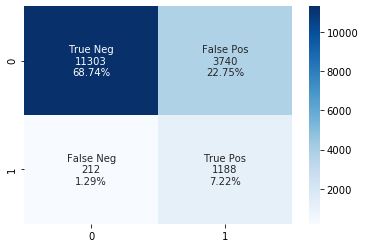

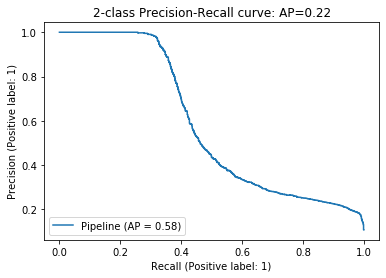

In [67]:
start = timer()

run_train(pipeline_scale_cb)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

In [68]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': df_fs5.drop('is_promoted', axis=1).columns,
    'Importance': cbc.feature_importances_
})
importancescb = importances.sort_values(by='Importance', ascending=False)
importancescb = importances.set_index('Feature')
importancescb

Learning rate set to 0.048896
0:	learn: 0.6337863	total: 26ms	remaining: 26s
1:	learn: 0.5894170	total: 48.7ms	remaining: 24.3s
2:	learn: 0.5299050	total: 72.1ms	remaining: 24s
3:	learn: 0.4979030	total: 94.9ms	remaining: 23.6s
4:	learn: 0.4674757	total: 121ms	remaining: 24s
5:	learn: 0.4406983	total: 143ms	remaining: 23.7s
6:	learn: 0.4156903	total: 164ms	remaining: 23.3s
7:	learn: 0.3936482	total: 188ms	remaining: 23.3s
8:	learn: 0.3767783	total: 214ms	remaining: 23.6s
9:	learn: 0.3597850	total: 234ms	remaining: 23.2s
10:	learn: 0.3426155	total: 253ms	remaining: 22.8s
11:	learn: 0.3307299	total: 273ms	remaining: 22.5s
12:	learn: 0.3185153	total: 292ms	remaining: 22.2s
13:	learn: 0.3083662	total: 315ms	remaining: 22.2s
14:	learn: 0.2975528	total: 338ms	remaining: 22.2s
15:	learn: 0.2884956	total: 358ms	remaining: 22s
16:	learn: 0.2794319	total: 376ms	remaining: 21.7s
17:	learn: 0.2667437	total: 399ms	remaining: 21.8s
18:	learn: 0.2603936	total: 421ms	remaining: 21.7s
19:	learn: 0.2565

161:	learn: 0.1616070	total: 3.67s	remaining: 19s
162:	learn: 0.1615130	total: 3.69s	remaining: 18.9s
163:	learn: 0.1614404	total: 3.71s	remaining: 18.9s
164:	learn: 0.1614000	total: 3.73s	remaining: 18.9s
165:	learn: 0.1612902	total: 3.76s	remaining: 18.9s
166:	learn: 0.1611900	total: 3.78s	remaining: 18.9s
167:	learn: 0.1611518	total: 3.81s	remaining: 18.9s
168:	learn: 0.1611262	total: 3.83s	remaining: 18.8s
169:	learn: 0.1610786	total: 3.85s	remaining: 18.8s
170:	learn: 0.1610580	total: 3.87s	remaining: 18.8s
171:	learn: 0.1610198	total: 3.89s	remaining: 18.7s
172:	learn: 0.1609746	total: 3.92s	remaining: 18.7s
173:	learn: 0.1608916	total: 3.94s	remaining: 18.7s
174:	learn: 0.1608317	total: 3.96s	remaining: 18.7s
175:	learn: 0.1607580	total: 3.98s	remaining: 18.7s
176:	learn: 0.1607064	total: 4.01s	remaining: 18.6s
177:	learn: 0.1605892	total: 4.04s	remaining: 18.6s
178:	learn: 0.1605697	total: 4.05s	remaining: 18.6s
179:	learn: 0.1603715	total: 4.08s	remaining: 18.6s
180:	learn: 0.

325:	learn: 0.1532061	total: 7.41s	remaining: 15.3s
326:	learn: 0.1531842	total: 7.43s	remaining: 15.3s
327:	learn: 0.1531471	total: 7.45s	remaining: 15.3s
328:	learn: 0.1531032	total: 7.48s	remaining: 15.3s
329:	learn: 0.1530610	total: 7.5s	remaining: 15.2s
330:	learn: 0.1530283	total: 7.53s	remaining: 15.2s
331:	learn: 0.1530144	total: 7.55s	remaining: 15.2s
332:	learn: 0.1530053	total: 7.57s	remaining: 15.2s
333:	learn: 0.1529628	total: 7.59s	remaining: 15.1s
334:	learn: 0.1529104	total: 7.61s	remaining: 15.1s
335:	learn: 0.1528177	total: 7.63s	remaining: 15.1s
336:	learn: 0.1527835	total: 7.65s	remaining: 15.1s
337:	learn: 0.1527065	total: 7.67s	remaining: 15s
338:	learn: 0.1526766	total: 7.7s	remaining: 15s
339:	learn: 0.1526617	total: 7.72s	remaining: 15s
340:	learn: 0.1526237	total: 7.74s	remaining: 15s
341:	learn: 0.1525976	total: 7.76s	remaining: 14.9s
342:	learn: 0.1525921	total: 7.78s	remaining: 14.9s
343:	learn: 0.1525632	total: 7.8s	remaining: 14.9s
344:	learn: 0.1525278	t

491:	learn: 0.1486320	total: 11.2s	remaining: 11.5s
492:	learn: 0.1485817	total: 11.2s	remaining: 11.5s
493:	learn: 0.1485504	total: 11.2s	remaining: 11.5s
494:	learn: 0.1485218	total: 11.2s	remaining: 11.5s
495:	learn: 0.1484868	total: 11.3s	remaining: 11.4s
496:	learn: 0.1484460	total: 11.3s	remaining: 11.4s
497:	learn: 0.1484166	total: 11.3s	remaining: 11.4s
498:	learn: 0.1483927	total: 11.3s	remaining: 11.4s
499:	learn: 0.1483573	total: 11.4s	remaining: 11.4s
500:	learn: 0.1483377	total: 11.4s	remaining: 11.3s
501:	learn: 0.1483113	total: 11.4s	remaining: 11.3s
502:	learn: 0.1482994	total: 11.4s	remaining: 11.3s
503:	learn: 0.1482837	total: 11.4s	remaining: 11.3s
504:	learn: 0.1482722	total: 11.5s	remaining: 11.2s
505:	learn: 0.1482694	total: 11.5s	remaining: 11.2s
506:	learn: 0.1482406	total: 11.5s	remaining: 11.2s
507:	learn: 0.1482292	total: 11.5s	remaining: 11.2s
508:	learn: 0.1481953	total: 11.6s	remaining: 11.1s
509:	learn: 0.1481925	total: 11.6s	remaining: 11.1s
510:	learn: 

652:	learn: 0.1448856	total: 14.9s	remaining: 7.92s
653:	learn: 0.1448624	total: 14.9s	remaining: 7.9s
654:	learn: 0.1448253	total: 15s	remaining: 7.88s
655:	learn: 0.1448120	total: 15s	remaining: 7.85s
656:	learn: 0.1447780	total: 15s	remaining: 7.83s
657:	learn: 0.1447579	total: 15s	remaining: 7.81s
658:	learn: 0.1447290	total: 15.1s	remaining: 7.79s
659:	learn: 0.1446976	total: 15.1s	remaining: 7.77s
660:	learn: 0.1446580	total: 15.1s	remaining: 7.75s
661:	learn: 0.1446396	total: 15.1s	remaining: 7.72s
662:	learn: 0.1446186	total: 15.2s	remaining: 7.7s
663:	learn: 0.1446072	total: 15.2s	remaining: 7.68s
664:	learn: 0.1445773	total: 15.2s	remaining: 7.66s
665:	learn: 0.1445584	total: 15.2s	remaining: 7.64s
666:	learn: 0.1445382	total: 15.3s	remaining: 7.61s
667:	learn: 0.1445359	total: 15.3s	remaining: 7.59s
668:	learn: 0.1445088	total: 15.3s	remaining: 7.57s
669:	learn: 0.1445009	total: 15.3s	remaining: 7.54s
670:	learn: 0.1444861	total: 15.3s	remaining: 7.52s
671:	learn: 0.1444815	

816:	learn: 0.1417123	total: 18.7s	remaining: 4.18s
817:	learn: 0.1416873	total: 18.7s	remaining: 4.16s
818:	learn: 0.1416737	total: 18.7s	remaining: 4.13s
819:	learn: 0.1416651	total: 18.7s	remaining: 4.11s
820:	learn: 0.1416557	total: 18.7s	remaining: 4.09s
821:	learn: 0.1416414	total: 18.8s	remaining: 4.06s
822:	learn: 0.1416261	total: 18.8s	remaining: 4.04s
823:	learn: 0.1416117	total: 18.8s	remaining: 4.02s
824:	learn: 0.1415849	total: 18.8s	remaining: 4s
825:	learn: 0.1415748	total: 18.9s	remaining: 3.97s
826:	learn: 0.1415679	total: 18.9s	remaining: 3.95s
827:	learn: 0.1415109	total: 18.9s	remaining: 3.92s
828:	learn: 0.1414924	total: 18.9s	remaining: 3.9s
829:	learn: 0.1414807	total: 18.9s	remaining: 3.88s
830:	learn: 0.1414645	total: 19s	remaining: 3.86s
831:	learn: 0.1414362	total: 19s	remaining: 3.83s
832:	learn: 0.1414199	total: 19s	remaining: 3.81s
833:	learn: 0.1413954	total: 19s	remaining: 3.79s
834:	learn: 0.1413643	total: 19.1s	remaining: 3.77s
835:	learn: 0.1413432	to

982:	learn: 0.1384161	total: 22.4s	remaining: 388ms
983:	learn: 0.1384018	total: 22.4s	remaining: 365ms
984:	learn: 0.1383913	total: 22.5s	remaining: 342ms
985:	learn: 0.1383640	total: 22.5s	remaining: 319ms
986:	learn: 0.1383404	total: 22.5s	remaining: 296ms
987:	learn: 0.1383217	total: 22.5s	remaining: 274ms
988:	learn: 0.1382954	total: 22.6s	remaining: 251ms
989:	learn: 0.1382708	total: 22.6s	remaining: 228ms
990:	learn: 0.1382522	total: 22.6s	remaining: 205ms
991:	learn: 0.1382371	total: 22.6s	remaining: 182ms
992:	learn: 0.1382271	total: 22.6s	remaining: 160ms
993:	learn: 0.1382066	total: 22.7s	remaining: 137ms
994:	learn: 0.1381915	total: 22.7s	remaining: 114ms
995:	learn: 0.1381729	total: 22.7s	remaining: 91.2ms
996:	learn: 0.1381431	total: 22.7s	remaining: 68.4ms
997:	learn: 0.1381239	total: 22.8s	remaining: 45.6ms
998:	learn: 0.1381113	total: 22.8s	remaining: 22.8ms
999:	learn: 0.1380936	total: 22.8s	remaining: 0us


,Importance
Feature,
avg_training_score,28.590608
KPIs_met >80%,28.293977
previous_year_rating,6.825397
awards_won?,1.028459
education,1.216944
no_of_trainings,1.849314
length_of_service,4.982148
age,1.829701
recruitment_channel_sourcing,0.718377


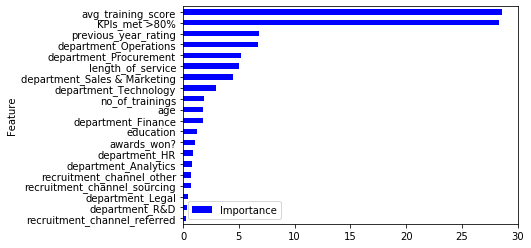

In [69]:
importancescb.sort_values(by='Importance', ascending=True).plot(kind = "barh", color = "blue");

##### XGBoost

K-fold cross-validation results: {'fit_time': array([30.1055913 , 31.45720029, 32.14979148, 30.63090348, 30.68491244,
       30.37353849, 30.49147964, 30.45289183, 31.03723931, 30.73154497]), 'score_time': array([0.12547922, 0.12470269, 0.11678696, 0.11574531, 0.13712454,
       0.17487836, 0.12135649, 0.14892006, 0.12223363, 0.1231029 ]), 'test_accuracy': array([0.93901486, 0.93692989, 0.94526974, 0.94422726, 0.94005734,
       0.94603754, 0.93821689, 0.93769552, 0.94447341, 0.94942649]), 'train_accuracy': array([0.94355306, 0.94381372, 0.94282901, 0.9432924 , 0.94349513,
       0.94300443, 0.94355469, 0.9436995 , 0.94274378, 0.94248313]), 'test_precision': array([0.91919192, 0.98230088, 0.9537037 , 0.97321429, 0.98198198,
       0.97560976, 0.96062992, 0.96969697, 0.98198198, 0.96638655]), 'train_precision': array([0.98640777, 0.98703888, 0.98144531, 0.98434442, 0.98804781,
       0.98605578, 0.98395186, 0.99011858, 0.98501499, 0.98414272]), 'test_recall': array([0.28706625, 0.316239

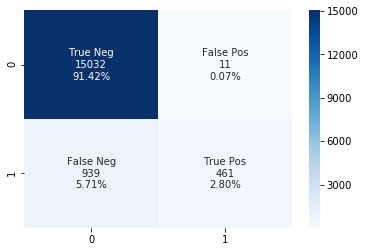

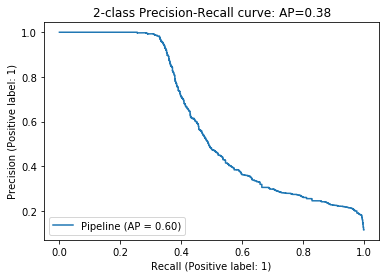

In [70]:
start = timer()

run_train(pipeline_scale_xgb)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

In [71]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': df_fs5.drop('is_promoted', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importancesxgb = importances.sort_values(by='Importance', ascending=False)
importancesxgb = importances.set_index('Feature')
importancesxgb

,Importance
Feature,
avg_training_score,0.073459
KPIs_met >80%,0.104421
previous_year_rating,0.045086
awards_won?,0.058477
education,0.008639
no_of_trainings,0.003419
length_of_service,0.009642
age,0.009346
recruitment_channel_sourcing,0.001270


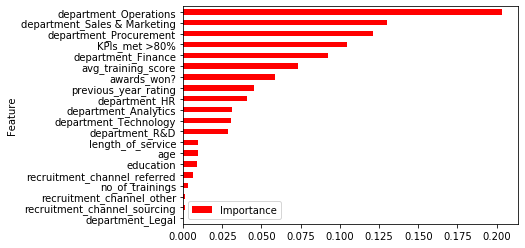

In [72]:
importancesxgb.sort_values(by='Importance', ascending=True).plot(kind = "barh", color = "red");

##### Decision Tree

K-fold cross-validation results: {'fit_time': array([0.3134613 , 0.29557252, 0.32386923, 0.32592583, 0.29155588,
       0.30451894, 0.34314442, 0.27498722, 0.33197999, 0.28860044]), 'score_time': array([0.0404706 , 0.03381252, 0.03594422, 0.03212094, 0.0340364 ,
       0.03200388, 0.03654695, 0.0334332 , 0.03337336, 0.03786874]), 'test_accuracy': array([0.88767266, 0.8881939 , 0.89418817, 0.89523065, 0.89027886,
       0.88607925, 0.88633994, 0.89129301, 0.89572471, 0.88477581]), 'train_accuracy': array([0.96895273, 0.96973471, 0.96843142, 0.96860519, 0.97005329,
       0.96973558, 0.96947493, 0.96944597, 0.96782415, 0.97005416]), 'test_precision': array([0.36165049, 0.40101523, 0.3775    , 0.38858696, 0.39903846,
       0.37303371, 0.40144231, 0.39130435, 0.4009901 , 0.33414044]), 'train_precision': array([0.73353219, 0.73624432, 0.7308642 , 0.73115079, 0.73921816,
       0.73802958, 0.734375  , 0.73565522, 0.72628726, 0.74130598]), 'test_recall': array([0.47003155, 0.45014245, 0.4902

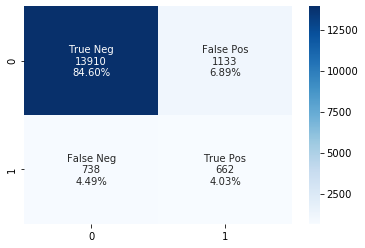

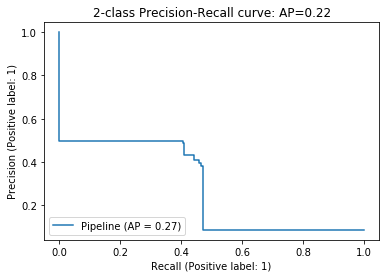

In [63]:
run_train(pipeline_scale_dt)

##### Random Forest

K-fold cross-validation results: {'fit_time': array([5.6087873 , 5.67617869, 5.51263332, 5.51796246, 5.59947681,
       5.70224071, 5.45706129, 5.64904666, 5.6815989 , 5.6551621 ]), 'score_time': array([0.44435096, 0.40799594, 0.41001773, 0.44908547, 0.41607165,
       0.41104102, 0.47003818, 0.43414354, 0.4205749 , 0.45295596]), 'test_accuracy': array([0.91321345, 0.90643732, 0.91998958, 0.91581965, 0.91191035,
       0.91397289, 0.91293014, 0.91006257, 0.91501564, 0.91110532]), 'train_accuracy': array([0.97095111, 0.97179101, 0.97066149, 0.97100904, 0.97179101,
       0.97135741, 0.97161806, 0.97179183, 0.97019896, 0.97219728]), 'test_precision': array([0.47101449, 0.48571429, 0.50188679, 0.49442379, 0.4982699 ,
       0.48979592, 0.53703704, 0.47619048, 0.48928571, 0.44155844]), 'train_precision': array([0.74885028, 0.75174916, 0.74802548, 0.748659  , 0.75290773,
       0.75044837, 0.75051813, 0.75309598, 0.74346613, 0.75712452]), 'test_recall': array([0.41009464, 0.38746439, 0.4318

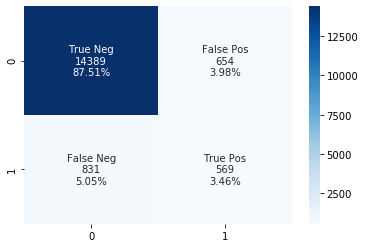

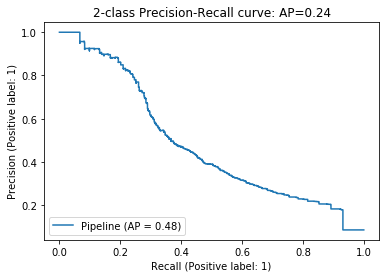

In [64]:
run_train(pipeline_scale_rf)

##### Extra Trees

K-fold cross-validation results: {'fit_time': array([22.87310719, 23.40277362, 23.54999447, 26.98316884, 28.08912754,
       27.60695839, 27.07339072, 26.91536903, 26.40957189, 23.03875017]), 'score_time': array([0.62531924, 0.56829   , 0.59859347, 0.60854197, 0.77944684,
       0.79395819, 0.68295979, 0.66256905, 0.56352592, 0.61701274]), 'test_accuracy': array([0.90252802, 0.89497003, 0.90304926, 0.90826166, 0.90383112,
       0.90328467, 0.90015641, 0.89885297, 0.90875912, 0.89781022]), 'train_accuracy': array([0.96895273, 0.96973471, 0.96843142, 0.96860519, 0.97005329,
       0.96973558, 0.96947493, 0.96944597, 0.96782415, 0.97005416]), 'test_precision': array([0.41176471, 0.42485549, 0.40532544, 0.44904459, 0.45092025,
       0.43304843, 0.45645646, 0.41515152, 0.45481928, 0.38337802]), 'train_precision': array([0.73353219, 0.73624432, 0.7308642 , 0.73115079, 0.73921816,
       0.73802958, 0.734375  , 0.73565522, 0.72628726, 0.74130598]), 'test_recall': array([0.41955836, 0.418803

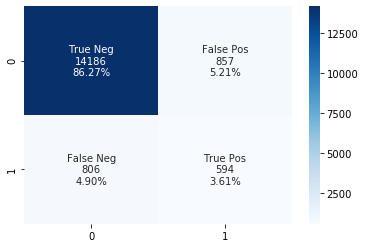

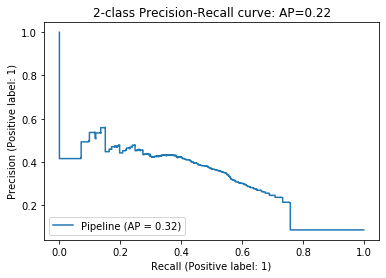

In [65]:
run_train(pipeline_scale_et)

##### AdaBoost

K-fold cross-validation results: {'fit_time': array([20.54396415, 20.41876364, 21.0242362 , 20.70166492, 20.58273792,
       20.6825335 , 20.23061347, 20.80363154, 21.04558539, 20.50360346]), 'score_time': array([0.85346198, 0.77455521, 0.71370983, 0.80006957, 0.79011941,
       0.71931314, 0.82599759, 0.74913812, 0.77911663, 0.80413938]), 'test_accuracy': array([0.93797237, 0.93380245, 0.94292416, 0.94136044, 0.93875424,
       0.94395203, 0.93534932, 0.93534932, 0.94421272, 0.94708029]), 'train_accuracy': array([0.93993281, 0.94140987, 0.94013554, 0.94068582, 0.94068582,
       0.94144053, 0.94112196, 0.94091923, 0.94025312, 0.94077442]), 'test_precision': array([0.85585586, 0.88188976, 0.8677686 , 0.86259542, 0.91803279,
       0.88111888, 0.87857143, 0.88888889, 0.90769231, 0.88636364]), 'train_precision': array([0.88163621, 0.9048913 , 0.8940865 , 0.89964476, 0.89036251,
       0.91833031, 0.90154968, 0.8902439 , 0.89055605, 0.90982143]), 'test_recall': array([0.29968454, 0.319088

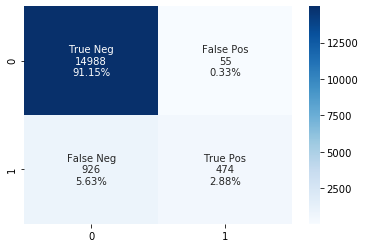

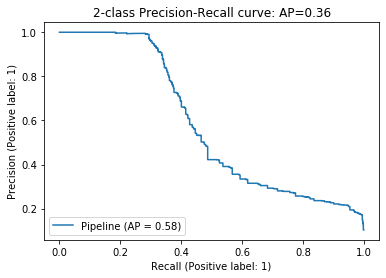

In [73]:
start = timer()

run_train(pipeline_scale_ab)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

### ===================================================

## Tuning

In [51]:
from time import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 1. Logistic Regression

In [66]:
clf_logreg = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())])

In [67]:
# tuned_parameters_logreg = {
#     'clf__C':np.logspace(-3,3,7)
# }

weights = np.linspace(0.05, 0.95, 20)
tuned_parameters_logreg = [    
    {
    'poly__degree':[1,2,3],
    'poly__interaction_only':(True,False),
#     'clf__C' : np.logspace(-4, 4, 20),
#     'clf__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'clf__max_iter' : [100,1000,1500,2000,2500],
    'clf__class_weight' : [{0: x, 1: 1.0-x} for x in weights]
#     'clf__penalty' : ['l1','l2']
    }
]

In [68]:
t=time()
cv = KFold(n_splits=10, shuffle=True, random_state=1)

#Membuat objek clf_bnb sebagai fungsi dari proses GridsearchCV
clf_logreg_gs = RandomizedSearchCV(clf_logreg, tuned_parameters_logreg, scoring = 'f1', cv=cv, return_train_score=True)

#Sesuaikan dengan model/Masukkan ke model/Fit the model
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
clf_logreg_gs.fit(X_train,y_train)

print("Hasil Score data train : ", clf_logreg_gs.score(X_train,y_train))
print("Hasil Score data test : ", clf_logreg_gs.score(X_test,y_test))

training_time = time() - t
print("Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: %0.3fs" % training_time)

C:\Users\Niken Amelia\.conda\envs\jcopml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Niken Amelia\.conda\envs\jcopml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\N

Hasil Score data train :  0.5379252060004226
Hasil Score data test :  0.498015873015873
Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: 1930.764s


In [69]:
print("Best parameters set found on development set:")
print(clf_logreg_gs.best_params_)
print("Best Score:", clf_logreg_gs.best_score_)
print('\n')

means = clf_logreg_gs.cv_results_['mean_test_score'] #nilai rata rata akurasi
stds = clf_logreg_gs.cv_results_['std_test_score'] #nilai standar deviasi
params = clf_logreg_gs.cv_results_['params'] #nilai-nilai param yang sudah didefinisikan ke opsi pengujian sebelumnya (text_clf_bnb,
#tuned_parameters_bnb yang dimana ditampilkan dalam bentuk berupa pencocokan secara satu-persatu

#Proses perulangan untuk menampilkan nilai-nilai tersebut
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'poly__interaction_only': False, 'poly__degree': 3, 'clf__max_iter': 2500, 'clf__class_weight': {0: 0.381578947368421, 1: 0.618421052631579}}
Best Score: 0.49656072803231377


Mean: 0.399798 Stdev:(0.018445) with: {'poly__interaction_only': True, 'poly__degree': 3, 'clf__max_iter': 1000, 'clf__class_weight': {0: 0.8552631578947368, 1: 0.14473684210526316}}
Mean: 0.435240 Stdev:(0.023930) with: {'poly__interaction_only': True, 'poly__degree': 2, 'clf__max_iter': 1000, 'clf__class_weight': {0: 0.618421052631579, 1: 0.381578947368421}}
Mean: 0.372991 Stdev:(0.023869) with: {'poly__interaction_only': True, 'poly__degree': 1, 'clf__max_iter': 2500, 'clf__class_weight': {0: 0.5710526315789474, 1: 0.42894736842105263}}
Mean: 0.482436 Stdev:(0.030069) with: {'poly__interaction_only': True, 'poly__degree': 3, 'clf__max_iter': 100, 'clf__class_weight': {0: 0.381578947368421, 1: 0.618421052631579}}
Mean: 0.496561 Stdev:(0.030567) with: {'poly__intera

K-fold cross-validation results: {'fit_time': array([50.4390161 , 51.86603498, 50.78309488, 53.88686872, 54.34613395,
       50.30748081, 45.93706417, 49.89028573, 48.32567143, 48.8362031 ]), 'score_time': array([0.18852353, 0.18450642, 0.19049072, 0.27725911, 0.22935414,
       0.20943928, 0.18749833, 0.21143627, 0.19747186, 0.20345497]), 'test_accuracy': array([0.93692989, 0.93015377, 0.94162106, 0.9434454 , 0.93692989,
       0.93925965, 0.93274244, 0.93274244, 0.94082377, 0.94160584]), 'train_accuracy': array([0.94326344, 0.94410334, 0.9430607 , 0.94239458, 0.94300278,
       0.94291755, 0.94387327, 0.9436995 , 0.94274378, 0.94259897]), 'test_precision': array([0.79527559, 0.76433121, 0.78767123, 0.8410596 , 0.84172662,
       0.79738562, 0.80769231, 0.78461538, 0.79245283, 0.73964497]), 'train_precision': array([0.87125749, 0.87585682, 0.87034277, 0.85917603, 0.86339623,
       0.86441948, 0.87251908, 0.865243  , 0.86043059, 0.86631815]), 'test_recall': array([0.31861199, 0.341880

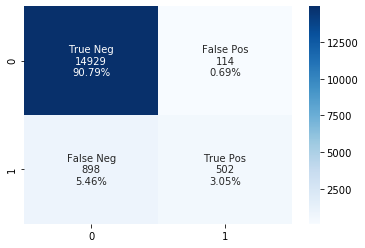

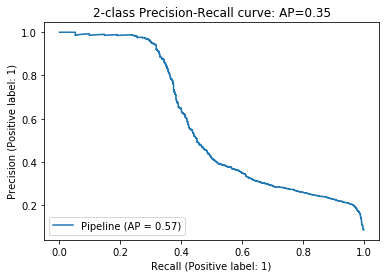

In [97]:
start = timer()

run_train(pipeline_scale_logreg_tun)

end = timer()
print("Waktu komputasi: ", end - start, "seconds")

### 2. LGBM

In [52]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [53]:
clf_lgbm = Pipeline([('poly', PolynomialFeatures()),
                     ('scaler', StandardScaler()),
                     ('clf', lgb.LGBMClassifier(random_state=314,
                                                max_depth=-1, 
                                                silent=True, 
                                                metric='f1', 
                                                n_jobs=4, 
#                                               class_weight=class_weight,
                                                is_unbalance=True,
                                                n_estimators=5000))])

In [54]:
weights = np.linspace(0.05, 0.95, 20)

tuned_parameters_lgbm = [    
    {
#     'poly__degree':[1,2,3],
#     'poly__interaction_only':(True,False),
#     'clf__class_weight' : [{0: x, 1: 1.0-x} for x in weights],
    'clf__num_leaves': sp_randint(6, 50), 
    'clf__min_child_samples': sp_randint(100, 500), 
    'clf__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'clf__subsample': sp_uniform(loc=0.2, scale=0.8), 
    'clf__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'clf__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'clf__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }
]

In [55]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
# clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='f1', n_jobs=4, is_unbalance=True, n_estimators=5000)

gs = RandomizedSearchCV(
    estimator=clf_lgbm, param_distributions=tuned_parameters_lgbm, 
    n_iter=100,
    scoring='f1',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
t=time()

gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

training_time = time() - t
print("Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: %0.3fs" % training_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
